In [1]:
%reload_ext autoreload

In [2]:
%autoreload 2

## 1. Multi-Class Classification:
For the multiclass classification problem, there were six different datasets. Some of the datasets contain missing values. For example, TrainData1, TestData1 and TrainData3 contain some missing values (1.00000000000000e+99). Therefore, the first approach needs to handle the missing values for selecting the features. Then compare the accuracy on train dataset to find out which classifier gives best result for each dataset with cross validation to verify the accuracy based on test dataset.
<center><div style='width:50%; height:50%'><img src='../images/Q1_table.jpg'></div></center>

Hint:
* Missing Value Estimation
    - (KNN method for imputation of the missing values)
* Dimensionality Reduction
* Use Several Classifiers/ Ensemble Method
    - Logistic Regression (with different c values)
    - Random Forest (with different estimator values)
    - SVM (with different kernels)
    - KNN (with k = 1,2,5,10,20)
    - K (3,5,10) Fold Cross Validation
* Performance Comparison
    - Classification Accuracy, Precision, Recall, Sensitivity, Specificity
    - AUC, ROC Curve

In [3]:
from AccuracyMetrics import *
from BPCA import *
from Helpers import *
from KNN import *
from LR import *
from MCROC import *
from RF import *
from SVM import *

In [4]:
# take out the trash
import gc
import warnings
gc.collect()
warnings.filterwarnings('ignore')

# Python magic
%matplotlib inline

# Base packages
import gc, sys, re, os, math
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

# Sklearn: KNN, SVM, LR, RF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
X_train2 = pd.read_csv('../data/1/TrainData2.txt', delimiter='\s+', header=None)
y_train2 = pd.read_csv('../data/1/TrainLabel2.txt', delimiter='\n', header=None)
X_test2 = pd.read_csv('../data/1/TestData2.txt', delimiter='\s+', header=None)

X_train3 = pd.read_csv('../data/1/TrainData3.txt', delimiter='\s+', header=None)
y_train3 = pd.read_csv('../data/1/TrainLabel3.txt', delimiter='\n', header=None)
X_test3 = pd.read_csv('../data/1/TestData3.txt', delimiter=',',   header=None)

X_train4 = pd.read_csv('../data/1/TrainData4.txt', delimiter='\s+', header=None)
y_train4 = pd.read_csv('../data/1/TrainLabel4.txt', delimiter='\n', header=None)
X_test4 = pd.read_csv('../data/1/TestData4.txt', delimiter='\s+', header=None)

X_train5 = pd.read_csv('../data/1/TrainData5.txt', delimiter='\s+', header=None)
y_train5 = pd.read_csv('../data/1/TrainLabel5.txt', delimiter='\n', header=None)
X_test5 = pd.read_csv('../data/1/TestData5.txt', delimiter='\s+', header=None)

X_train6 = pd.read_csv('../data/1/TrainData6.txt', delimiter='\s+', header=None)
y_train6 = pd.read_csv('../data/1/TrainLabel6.txt', delimiter='\n', header=None)
X_test6 = pd.read_csv('../data/1/TestData6.txt', delimiter='\s+', header=None)

X_training = [X_train2, X_train3, X_train4, X_train5, X_train6]
y_training = [y_train2, y_train3, y_train4, y_train5, y_train6]
X_testing = [X_test2, X_test3, X_test4, X_test5, X_test6]

for i,x in enumerate(X_training):
    print(f'X_TrainData{i+2} Shape: {x.shape}')

for i,y in enumerate(y_training):
    print(f'y_TrainData{i+2} Shape: {y.shape}')

for j,y in enumerate(X_testing):
    print(f'TestData{j+2} Shape: {y.shape}')

X_TrainData2 Shape: (100, 9182)
X_TrainData3 Shape: (6300, 13)
X_TrainData4 Shape: (2547, 112)
X_TrainData5 Shape: (1119, 11)
X_TrainData6 Shape: (612, 142)
y_TrainData2 Shape: (100, 1)
y_TrainData3 Shape: (6300, 1)
y_TrainData4 Shape: (2547, 1)
y_TrainData5 Shape: (1119, 1)
y_TrainData6 Shape: (612, 1)
TestData2 Shape: (74, 9182)
TestData3 Shape: (2693, 13)
TestData4 Shape: (1092, 112)
TestData5 Shape: (480, 11)
TestData6 Shape: (262, 142)


## Dataset 2

## PCA for DS2

In [6]:
printShapes(X_train2=X_train2.shape, y_train2=y_train2.shape, X_test2=X_test2.shape)

printHeads(X_train2=X_train2.head(), y_train2=y_train2.head())
           
printTails(y_train2=y_train2.tail())

X_train2 Shape: (100, 9182)

y_train2 Shape: (100, 1)

X_test2 Shape: (74, 9182)

X_train2 Head:        0         1         2         3         4        5         6     \
0  2.357935  1.505150  1.477121  1.301030  2.992995  1.30103  2.729974   
1  1.995635  1.633468  1.740363  1.819544  3.703377  1.30103  3.000434   
2  1.929419  1.301030  1.447158  1.301030  3.377852  1.30103  3.053463   
3  2.227887  1.602060  1.556302  1.908485  3.424392  1.30103  3.084219   
4  1.763428  1.623249  1.301030  2.029384  3.551694  1.30103  3.165541   

       7         8         9     ...      9172      9173      9174      9175  \
0  3.275542  3.531734  2.117271  ...  1.531479  1.792392  2.000000  1.477121   
1  3.118926  3.363424  1.568202  ...  1.755875  2.064458  1.431364  1.633468   
2  3.390405  3.359836  1.707570  ...  1.982271  2.198657  1.301030  1.707570   
3  3.288696  3.364176  1.301030  ...  1.792392  2.204120  1.633468  1.716003   
4  3.141450  3.495128  1.886491  ...  1.301030  1.785330  

In [7]:
X_train2_cmp, X_test2_cmp = trainPCA(X_train2, X_test2)

X_train Variance: 0.9287852222496773
X_train Shape: (100, 9182)
X_train Variance: 1.0
X_train Shape: (74, 74)


In [8]:
printShapes(X_train2_cmp=X_train2_cmp.shape, y_train2=y_train2.shape, X_test2_cmp=X_test2_cmp.shape)

X_train2_cmp Shape: (100, 74)

y_train2 Shape: (100, 1)

X_test2_cmp Shape: (74, 74)



### KNN for DS2

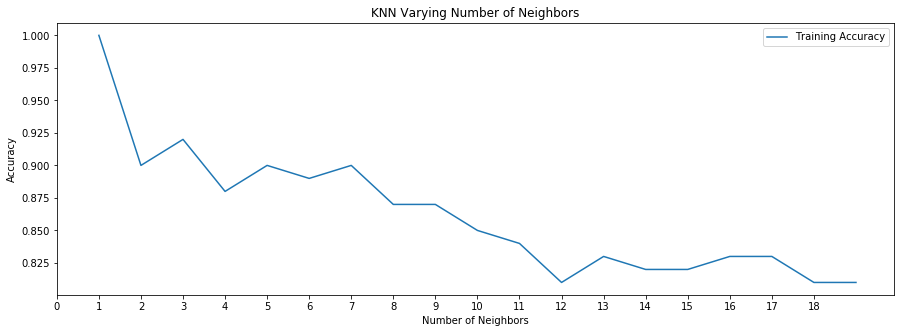

In [9]:
n_neighbors2, train_accuracy2 = testK(X_train2_cmp, y_train2)
plotTestK(n_neighbors2, train_accuracy2, [15,5])

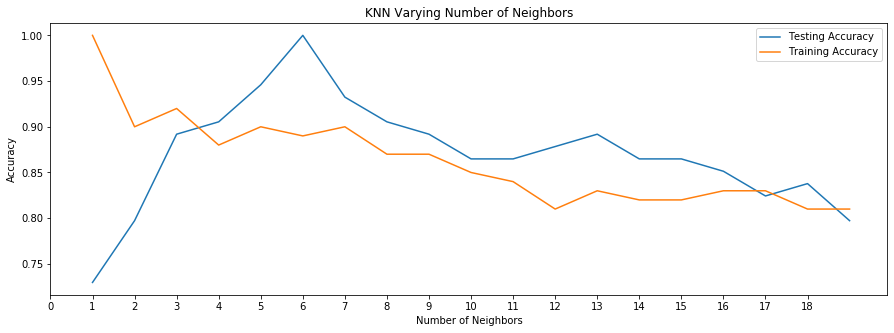

In [10]:
y_test2 = getTestLabelsKNN(6, X_train2_cmp, y_train2, X_test2_cmp)
n2, test_acc2, train_acc2 = optimizeK(X_train2_cmp, y_train2, X_test2_cmp, y_test2, 20)
plotK(n2, test_acc2, train_acc2, [15, 5])

In [11]:
n_neighbors2=10
knn_score2, knn_y_pred2 = runKNN(n_neighbors2, X_train2_cmp, y_train2, X_test2_cmp, y_test2)
print(f'Accuracy: {knn_score2}')

Accuracy: 0.8648648648648649


In [12]:
knn_keys2, knn_vals2, knn_labels2 = countUniqueValues(knn_y_pred2)

Keys: dict_keys([2, 1, 6, 5, 11, 3, 4, 8])
Values: dict_values([3, 20, 26, 1, 1, 5, 15, 3])
Labels: [2, 1, 6, 5, 11, 3, 4, 8]


In [13]:
getScoresKNN(n_neighbors2, y_test2, knn_y_pred2)
pd.crosstab(y_test2, knn_y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Accuracy Score, k=10: 0.8648648648648649

KNN Confusion Matrix, k=10

[[15  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 3  0  1 15  0  1  0  0  0]
 [ 0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0 24  0  0  0]
 [ 2  1  0  0  0  0  3  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1]]

		  KNN Classification Report, k=10

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        15
           2       0.33      1.00      0.50         1
           3       0.80      1.00      0.89         4
           4       1.00      0.75      0.86        20
           5       1.00      0.50      0.67         2
           6       0.92      1.00      0.96        24
           8       1.00      0.50      0.67         6
           9       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1

    accuracy                           0.86        74
   macro avg       0.

Predicted   1  2  3   4  5   6  8  11  All
True                                      
1          15  0  0   0  0   0  0   0   15
2           0  1  0   0  0   0  0   0    1
3           0  0  4   0  0   0  0   0    4
4           3  0  1  15  0   1  0   0   20
5           0  0  0   0  1   1  0   0    2
6           0  0  0   0  0  24  0   0   24
8           2  1  0   0  0   0  3   0    6
9           0  1  0   0  0   0  0   0    1
11          0  0  0   0  0   0  0   1    1
All        20  3  5  15  1  26  3   1   74

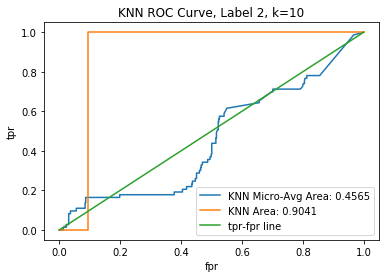

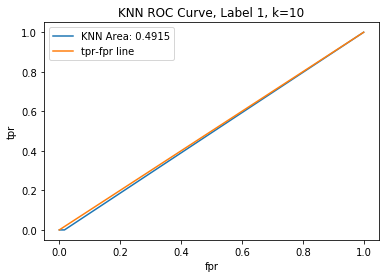

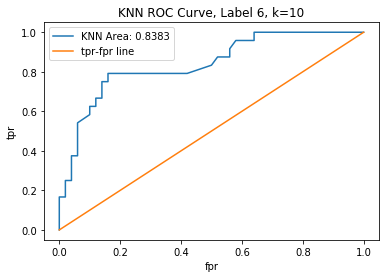

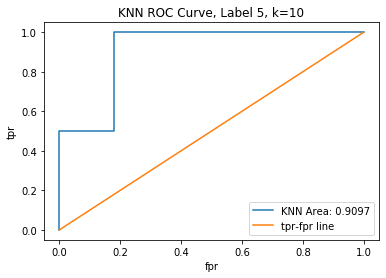

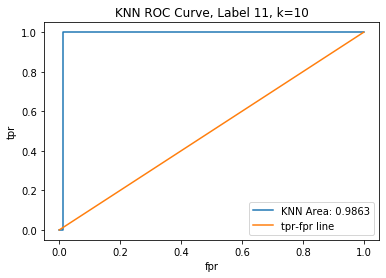

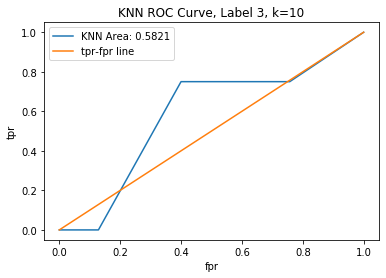

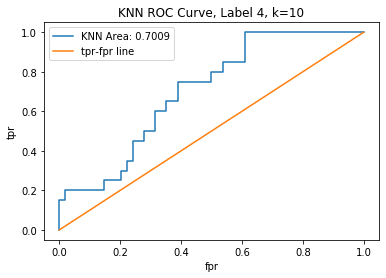

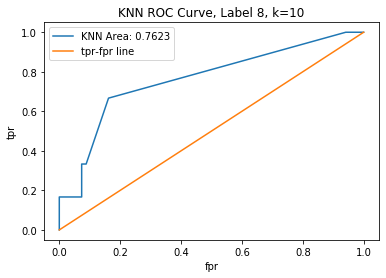

In [14]:
calcMultiClassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, y_test2, model='KNN', tuner='k',\
 tuner_val=n_neighbors2, labels=knn_labels2, dec=False)

__________________________________________________________________________________________________________________________________________________

### Logistic Regression for DS2

In [15]:
c2 = 10
lr_cma2, lr_cr2, lr_acc2, lr_y_pred2, ky2, val2 = runLogisticRegression(c2, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

print(f'Logistic Regression Highest Accuracy Score, c={ky2}: {val2}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma2[ky2]}\n')
pd.crosstab(y_test2, lr_y_pred2[ky2], rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression Highest Accuracy Score, c=5: 0.5405405405405406

Logistic Regression Most Accurate Confusion Matrix

[[ 8  0  0  0  2  0  0  1  0  3  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  1  1  0  0]
 [ 0  0  1 11  3  0  0  0  3  2  0]
 [ 0  1  0  0  1  0  0  0  0  0  0]
 [ 0  1  2  0  2 12  2  0  1  1  3]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]



Predicted  1  2  3   4  5   6  7  8  9  10  11  All
True                                               
1          8  0  0   0  2   0  0  1  0   3   1   15
2          0  1  0   0  0   0  0  0  0   0   0    1
3          0  0  2   0  0   0  0  1  1   0   0    4
4          0  0  1  11  3   0  0  0  3   2   0   20
5          0  1  0   0  1   0  0  0  0   0   0    2
6          0  1  2   0  2  12  2  0  1   1   3   24
8          0  0  0   0  0   0  0  4  0   1   1    6
9          0  1  0   0  0   0  0  0  0   0   0    1
11         0  0  0   0  0   0  0  0  0   0   1    1
All        8  4  5  11  8  12  2  6  5   7   6   74

In [16]:
print(f'\n\t   Logistic Regression Classification Report C={ky2}\n\n{lr_cr2[ky2]}')


	   Logistic Regression Classification Report C=5

              precision    recall  f1-score   support

           1       1.00      0.53      0.70        15
           2       0.25      1.00      0.40         1
           3       0.40      0.50      0.44         4
           4       1.00      0.55      0.71        20
           5       0.12      0.50      0.20         2
           6       1.00      0.50      0.67        24
           7       0.00      0.00      0.00         0
           8       0.67      0.67      0.67         6
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.17      1.00      0.29         1

    accuracy                           0.54        74
   macro avg       0.42      0.48      0.37        74
weighted avg       0.88      0.54      0.64        74



In [17]:
lr_keys2, lr_vals2, lr_labels2 = countUniqueValues(lr_y_pred2[ky2])

Keys: dict_keys([2, 10, 9, 6, 5, 3, 8, 11, 4, 1, 7])
Values: dict_values([4, 7, 5, 12, 8, 5, 6, 6, 11, 8, 2])
Labels: [2, 10, 9, 6, 5, 3, 8, 11, 4, 1, 7]


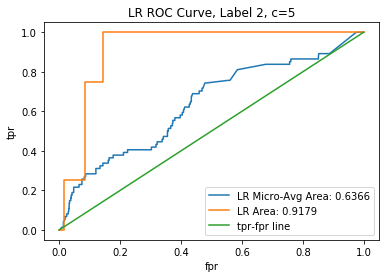

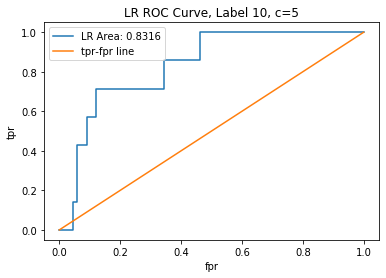

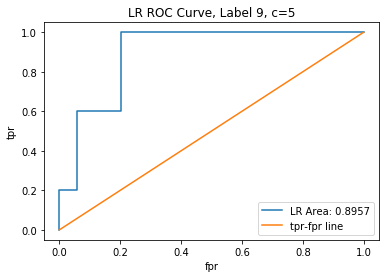

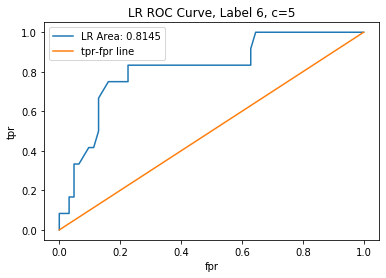

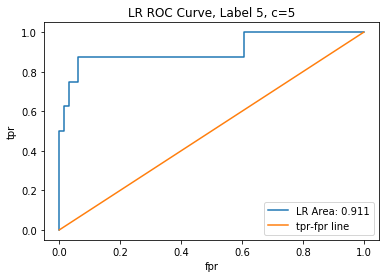

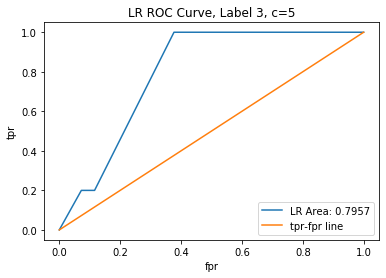

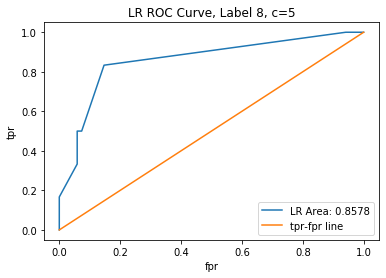

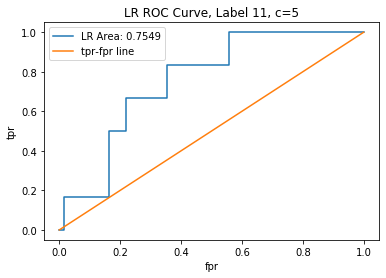

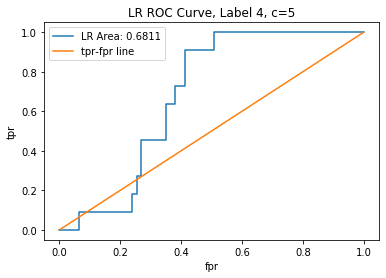

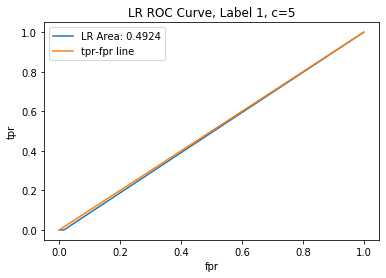

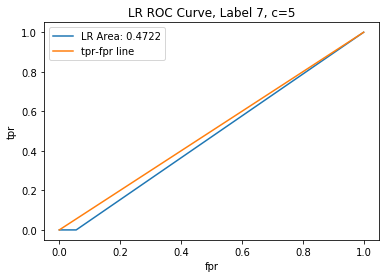

In [18]:
calcMultiClassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, lr_y_pred2[ky2], model='LR',\
                     tuner='c', tuner_val=ky2, labels=lr_labels2, dec=False)

## Random Forest for DS2

Keys: dict_keys([2, 1, 6, 5, 3, 7, 10, 8, 11, 4, 9])
Values: dict_values([14, 6, 10, 9, 8, 3, 7, 4, 2, 8, 3])
Labels: [2, 1, 6, 5, 3, 7, 10, 8, 11, 4, 9]

Random Forest Accuracy Score: 0.2702702702702703

Random Forest Confusion Matrix

[[4 2 5 0 0 0 0 1 0 2 1]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 1 0 0 0]
 [1 2 1 7 2 2 2 2 1 0 0]
 [0 1 0 0 1 0 0 0 0 0 0]
 [0 5 0 1 5 8 0 0 2 2 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 3 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.67      0.27      0.38        15
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.88      0.35      0.50        20
           5       0.11      0.50      0.18         2
           6       0.80      0.33      0.47        24
           7       0.00      0.00      0.00         0
           8 

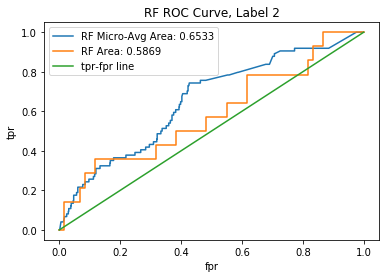

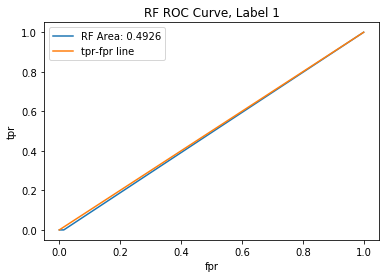

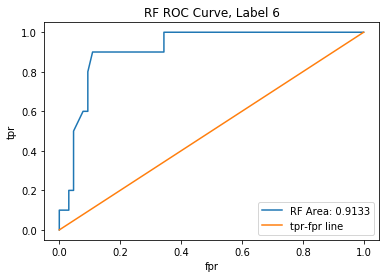

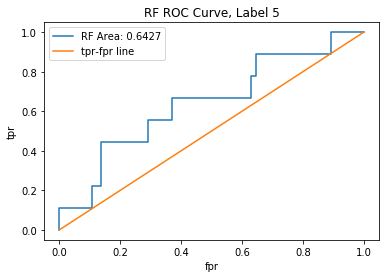

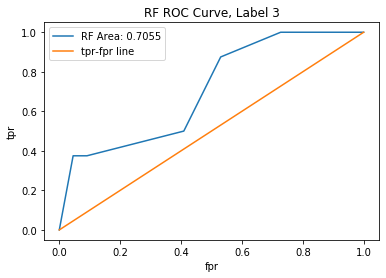

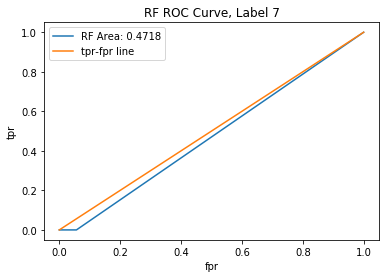

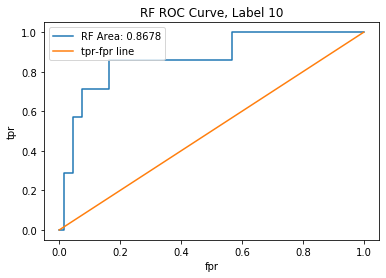

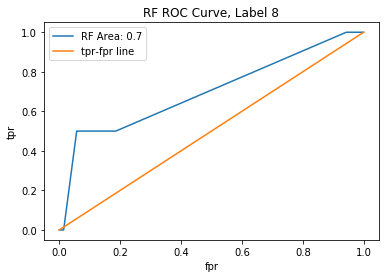

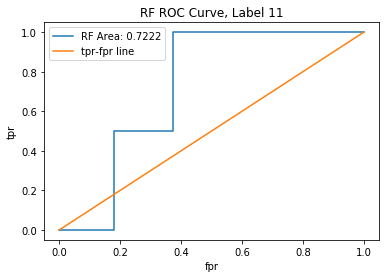

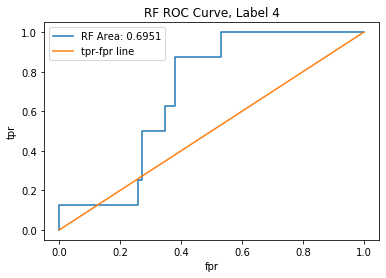

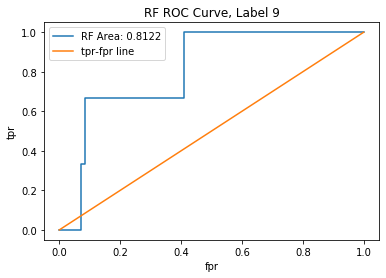

In [19]:
runRandomForest(X_train2_cmp, y_train2, X_test2_cmp, y_test2)

## SVM for DS2

SVM linear Kernel results
_________________________________________
Keys: dict_keys([2, 10, 9, 6, 5, 8, 11, 3, 4, 1, 7])
Values: dict_values([8, 9, 2, 13, 9, 6, 3, 8, 11, 4, 1])
Labels: [2, 10, 9, 6, 5, 8, 11, 3, 4, 1, 7]

SVM linear Kernel Accuracy Score: 0.5135135135135135

SVM linear Kernel Confusion Matrix

[[ 4  0  2  0  3  0  0  1  0  4  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  1  0  0]
 [ 0  0  2 11  3  0  1  1  1  1  0]
 [ 0  1  0  0  1  0  0  0  0  0  0]
 [ 0  5  1  0  2 13  0  0  0  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


		    SVM linear Kernel Classification Report

              precision    recall  f1-score   support

           1       1.00      0.27      0.42        15
           2       0.12      1.00      0.22         1
           3       0.38      0.75      0.50         4
           4       1.00 

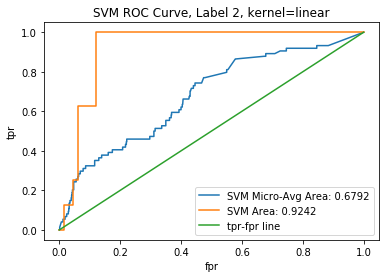

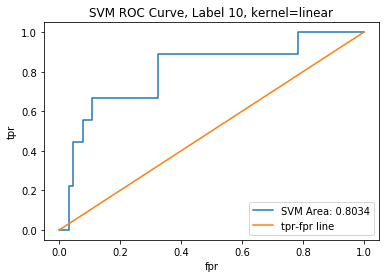

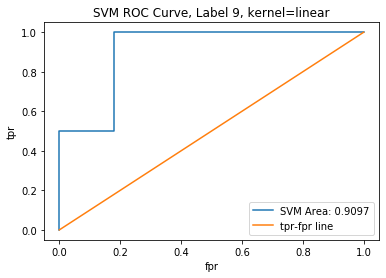

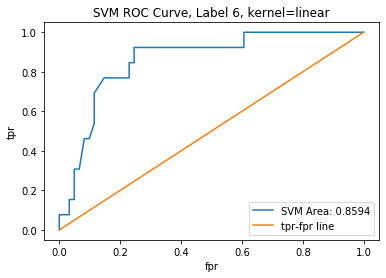

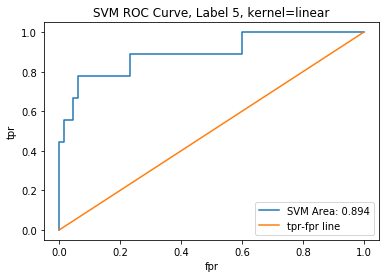

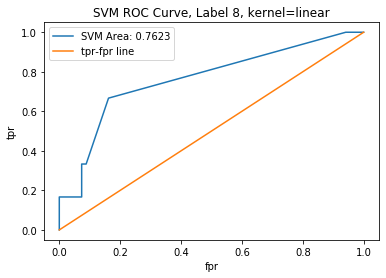

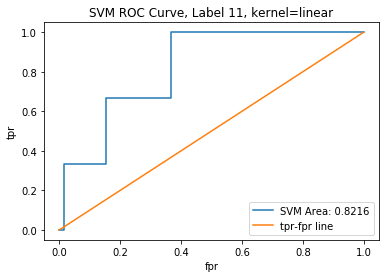

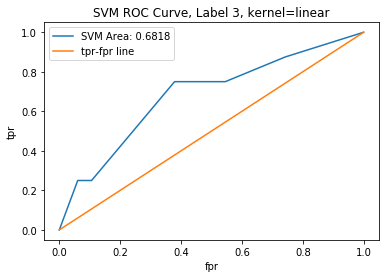

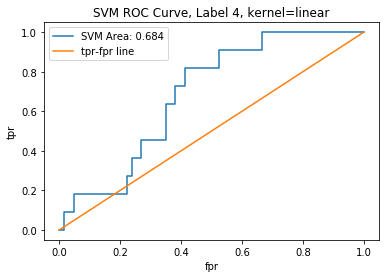

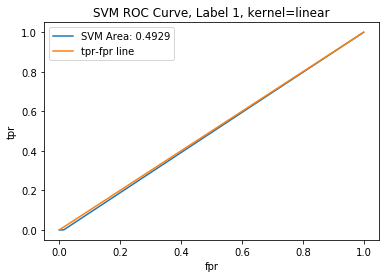

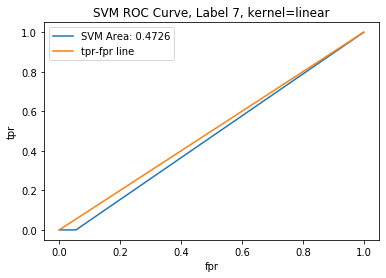

SVM poly Kernel results
_________________________________________
Keys: dict_keys([2, 4, 5, 11, 3, 8])
Values: dict_values([8, 54, 1, 1, 7, 3])
Labels: [2, 4, 5, 11, 3, 8]

SVM poly Kernel Accuracy Score: 0.3783783783783784

SVM poly Kernel Confusion Matrix

[[ 0  0  1 14  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0]
 [ 0  6  3 14  0  0  1  0  0]
 [ 0  0  0  4  0  0  2  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1]]


		    SVM poly Kernel Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.12      1.00      0.22         1
           3       0.43      0.75      0.55         4
           4       0.37      1.00      0.54        20
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00        24
           8       0.67      0.33      0.44 

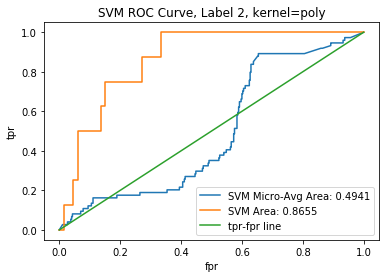

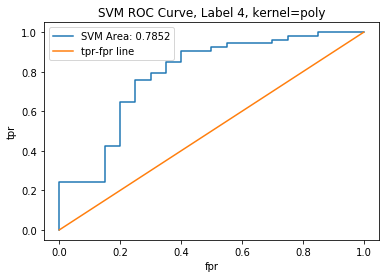

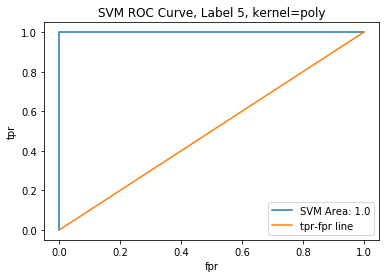

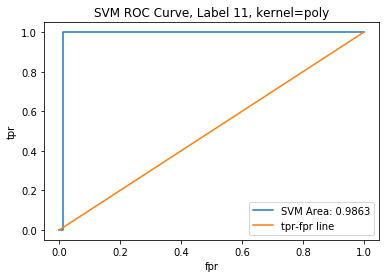

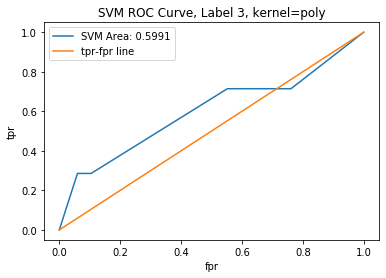

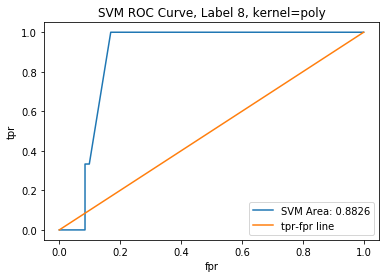

SVM sigmoid Kernel results
_________________________________________
Keys: dict_keys([1, 2, 6, 5, 8, 3, 4, 11])
Values: dict_values([35, 2, 10, 7, 2, 10, 6, 2])
Labels: [1, 2, 6, 5, 8, 3, 4, 11]

SVM sigmoid Kernel Accuracy Score: 0.44594594594594594

SVM sigmoid Kernel Confusion Matrix

[[14  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  1  0  0]
 [ 4  0  8  6  2  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0]
 [13  0  0  0  2  8  0  0  1]
 [ 2  0  0  0  0  2  1  0  1]
 [ 1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]]


		    SVM sigmoid Kernel Classification Report

              precision    recall  f1-score   support

           1       0.40      0.93      0.56        15
           2       0.50      1.00      0.67         1
           3       0.20      0.50      0.29         4
           4       1.00      0.30      0.46        20
           5       0.14      0.50      0.22         2
           6       0.80      0.33      0.47        24
           

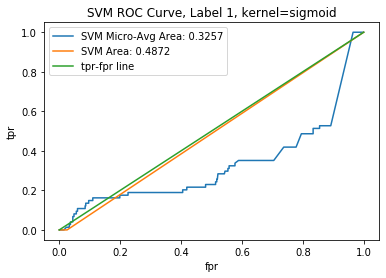

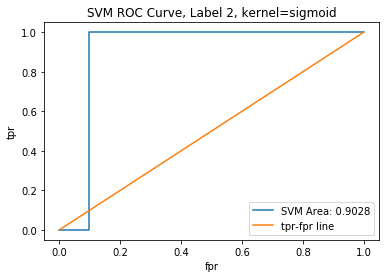

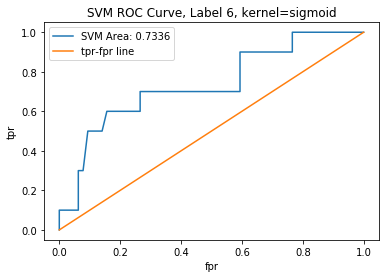

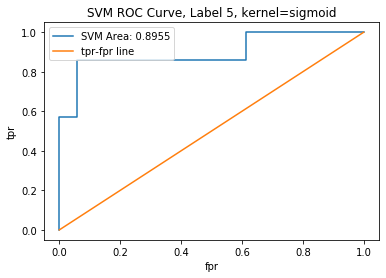

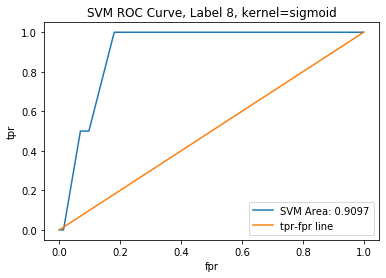

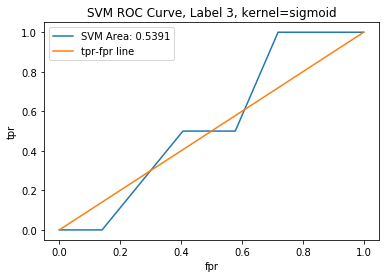

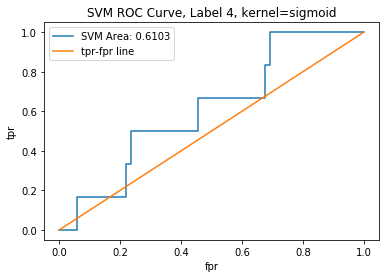

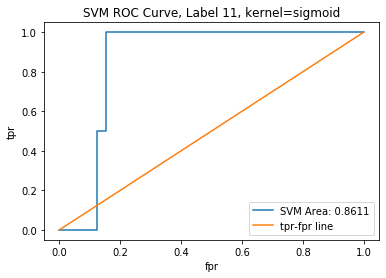

In [20]:
kernels = ['linear', 'poly', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

# Dataset 3

In [21]:
X_train3 = pd.read_csv('../data/1/TrainData3.txt', delimiter='\s+', header=None) # y_train3 = pd.read_csv('../data/1/TrainLabel3.txt', delimiter='\n', header=None)# X_test3 = pd.read_csv('../data/1/TestData3.txt', delimiter='\s+', header=None)

In [22]:
X_train3.shape

(6300, 13)

In [23]:
X_train3.head()

0    1   2    3    4    5   6    7   8    9    10   11            12
0   2  1.0   5  4.0  5.0  5.0   3  3.0   0  1.0  1.0  7.0  1.000000e+99
1   1  1.0   5  5.0  5.0  5.0   3  5.0   2  1.0  1.0  7.0  1.000000e+00
2   2  1.0   3  5.0  1.0  5.0   2  3.0   1  2.0  3.0  7.0  1.000000e+00
3   2  5.0   1  2.0  6.0  5.0   1  4.0   2  3.0  1.0  7.0  1.000000e+00
4   2  5.0   1  2.0  6.0  3.0   1  4.0   2  3.0  1.0  7.0  1.000000e+00

In [24]:
X_train3 = replaceWithNan(X_train3, 0, 12)

Bad Values 1.0000000000000001e+99 replaced with NaN.


In [25]:
# best results at 30
X_train3 = runFastKNN(X_train3, 30)

Running fast_knn, k=30.


## KNN for DS3

In [26]:
X_test3.shape

(2693, 13)

In [27]:
printHeads(y_train3=y_train3.head(), y_test3=X_test3.head())

y_train3 Head:    0
0  9
1  9
2  9
3  1
4  1

y_test3 Head:    0   1   2   3   4   5   6   7   8   9   10  11  12
0   1   5   3   4   1   5   1   3   0   1   1   7   1
1   2   1   4   3   5   5   3   2   0   1   1   7   1
2   1   5   2   3   9   2   1   4   1   3   1   7   1
3   1   2   2   2   3   2   1   4   2   3   3   7   1
4   2   5   3   4   1   2   1   1   0   2   2   7   1



In [28]:
y_train3.tail()

0
6295  7
6296  9
6297  5
6298  9
6299  8

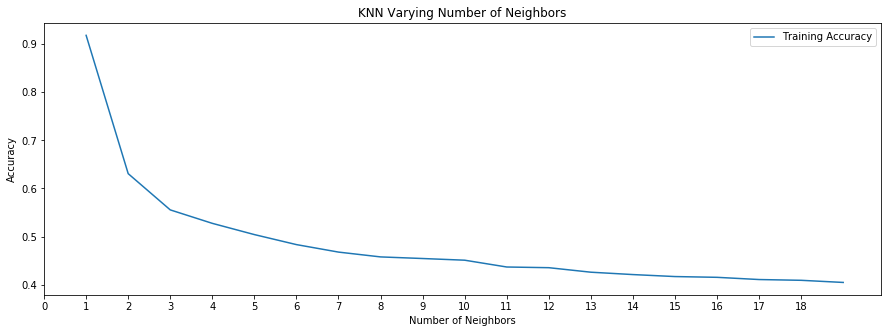

In [29]:
neighbors3, train_accuracy3 = testK(X_train3, y_train3)
plotTestK(neighbors3, train_accuracy3, [15,5])

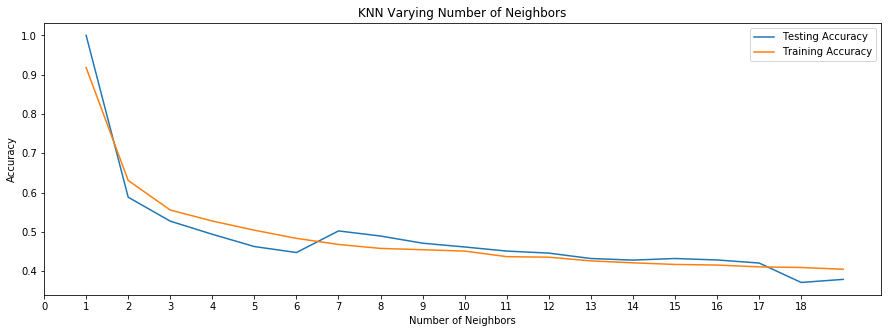

In [30]:
y_test3 = getTestLabelsKNN(1, X_train3, y_train3, X_test3)
n3, test_acc3, train_acc3 = optimizeK(X_train3, y_train3, X_test3, y_test3, 20)
plotK(n3, test_acc3, train_acc3, [15, 5])

In [31]:
n_neighbors3=9
knn_score3, knn_y_pred3 = runKNN(n_neighbors3, X_train3, y_train3, X_test3, y_test3)
print(f'Accuracy: {knn_score3}')

Accuracy: 0.4712216858522094


In [32]:
knn_keys3, knn_vals3, knn_labels3 = countUniqueValues(knn_y_pred3)

Keys: dict_keys([8, 9, 1, 5, 2, 7, 6, 3, 4])
Values: dict_values([344, 178, 782, 158, 368, 189, 296, 172, 206])
Labels: [8, 9, 1, 5, 2, 7, 6, 3, 4]


KNN Accuracy Score, k=9: 0.4712216858522094

KNN Confusion Matrix, k=9

[[412  24  17  14   4   3   3   1   3]
 [ 38 263  14  14   7  50   5  10   2]
 [ 27  20  62  11   6  16  10  11   0]
 [100  16  27  74  24  24   8  14   4]
 [ 91  23  14  17  48  28   8  13   5]
 [ 26   9  16  18  19  94  27  19  14]
 [ 20   5   9  27  22  35  69  41  17]
 [ 29   5   7  25  27  35  36 156  42]
 [ 39   3   6   6   1  11  23  79  91]]

		  KNN Classification Report, k=9

              precision    recall  f1-score   support

           1       0.53      0.86      0.65       481
           2       0.71      0.65      0.68       403
           3       0.36      0.38      0.37       163
           4       0.36      0.25      0.30       291
           5       0.30      0.19      0.24       247
           6       0.32      0.39      0.35       242
           7       0.37      0.28      0.32       245
           8       0.45      0.43      0.44       362
           9       0.51      0.35      0.42       25

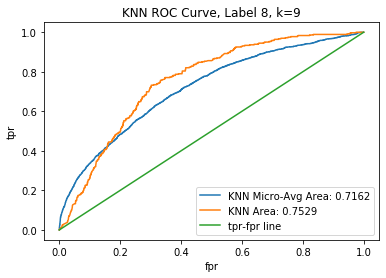

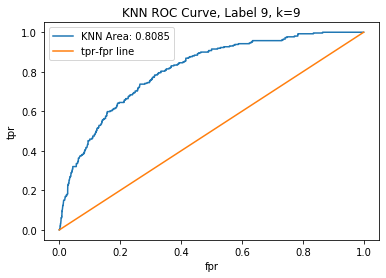

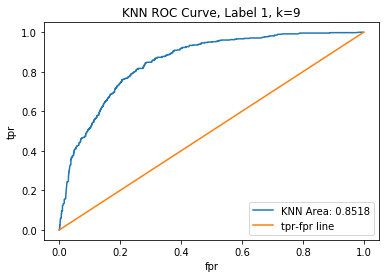

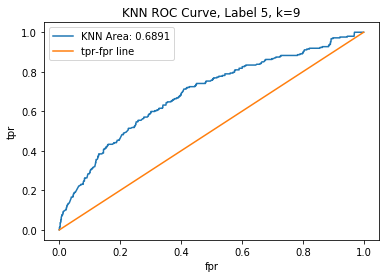

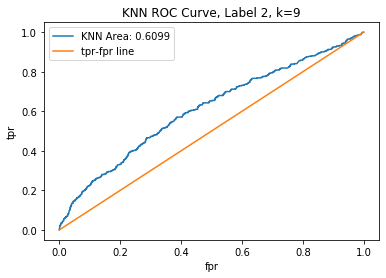

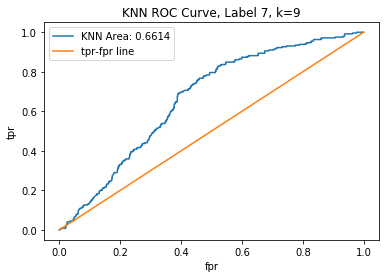

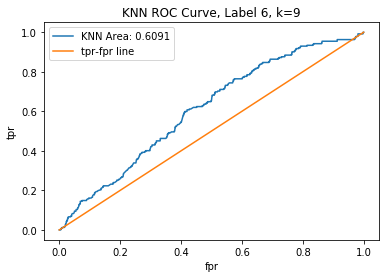

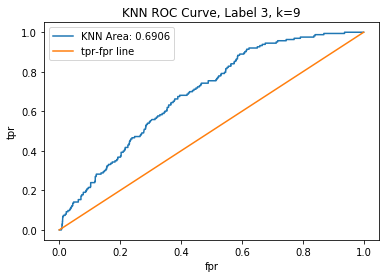

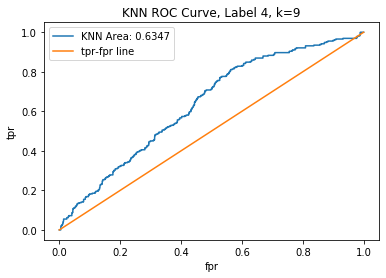

In [33]:
getScoresKNN(n_neighbors3, y_test3, knn_y_pred3)
pd.crosstab(y_test3, knn_y_pred3, rownames=['True'], colnames=['Predicted'], margins=True)
calcMultiClassROCAUC(X_train3, y_train3, X_test3, y_test3, model='KNN', tuner='k',\
                     tuner_val=n_neighbors3, labels=knn_labels3, dec=False)

## LR for DS3

In [34]:
c3 = 20
lr_cma3, lr_cr3, lr_acc3, lr_y_pred3, ky3, val3 = runLogisticRegression(c3, X_train3, y_train3, X_test3, y_test3)
print(f'Logistic Regression Highest Accuracy Score, C={ky3}: {val3}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma3[ky3]}\n')
pd.crosstab(y_test3, lr_y_pred3[ky3], rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression Highest Accuracy Score, C=15: 0.27255848496101004

Logistic Regression Most Accurate Confusion Matrix

[[406  13   0   6   1   8  20  10  17]
 [203   9   0   4   1  28 143  12   3]
 [ 65  10   1  14   0  30  10  29   4]
 [100  61   1  25   1  35   8  42  18]
 [ 56   9   0  27   2  31   2  47  73]
 [ 38  15   0  12   4  48   8 103  14]
 [ 42   9   1  11   0  48   5 120   9]
 [ 67   2   1   9   2  49   6 187  39]
 [ 35   3   0   1   0  11   5 153  51]]



Predicted     1    2  3    4   5    6    7    8    9   All
True                                                      
1           406   13  0    6   1    8   20   10   17   481
2           203    9  0    4   1   28  143   12    3   403
3            65   10  1   14   0   30   10   29    4   163
4           100   61  1   25   1   35    8   42   18   291
5            56    9  0   27   2   31    2   47   73   247
6            38   15  0   12   4   48    8  103   14   242
7            42    9  1   11   0   48    5  120    9   245
8            67    2  1    9   2   49    6  187   39   362
9            35    3  0    1   0   11    5  153   51   259
All        1012  131  4  109  11  288  207  703  228  2693

In [35]:
print(f'\n\t   Logistic Regression Classification Report C={ky3}\n\n{lr_cr3[ky3]}')


	   Logistic Regression Classification Report C=15

              precision    recall  f1-score   support

           1       0.40      0.84      0.54       481
           2       0.07      0.02      0.03       403
           3       0.25      0.01      0.01       163
           4       0.23      0.09      0.13       291
           5       0.18      0.01      0.02       247
           6       0.17      0.20      0.18       242
           7       0.02      0.02      0.02       245
           8       0.27      0.52      0.35       362
           9       0.22      0.20      0.21       259

    accuracy                           0.27      2693
   macro avg       0.20      0.21      0.17      2693
weighted avg       0.21      0.27      0.20      2693



In [36]:
lr_keys3, lr_vals3, lr_labels3 = countUniqueValues(lr_y_pred3[ky3])

Keys: dict_keys([8, 1, 6, 9, 2, 7, 4, 5, 3])
Values: dict_values([703, 1012, 288, 228, 131, 207, 109, 11, 4])
Labels: [8, 1, 6, 9, 2, 7, 4, 5, 3]


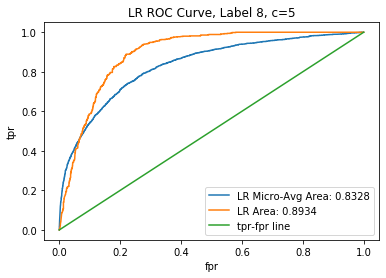

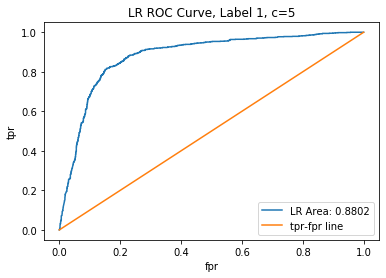

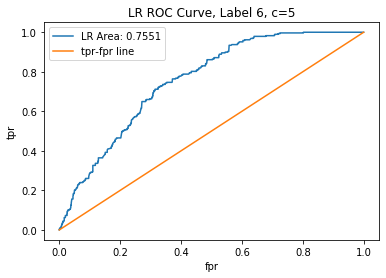

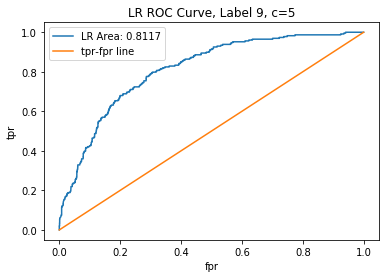

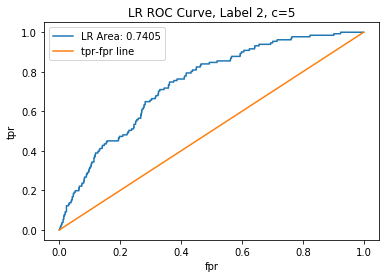

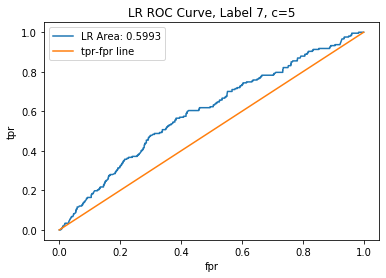

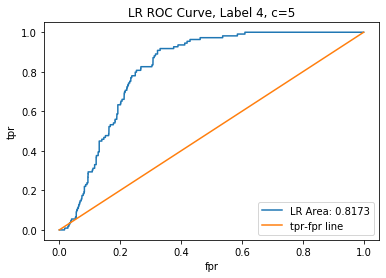

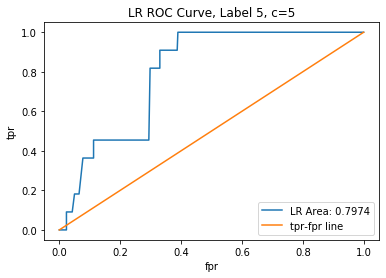

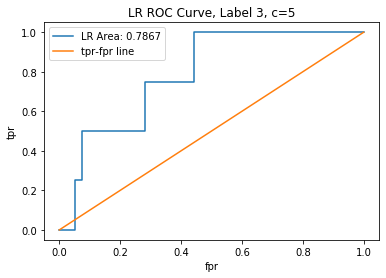

In [37]:
calcMultiClassROCAUC(X_train3, y_train3, X_test3, lr_y_pred3[ky3], model='LR', tuner='c', tuner_val=ky2, labels=lr_labels3, dec=False)

## Random Forest for DS3

Keys: dict_keys([7, 8, 1, 5, 6, 9, 3, 4, 2])
Values: dict_values([250, 387, 715, 191, 324, 215, 194, 204, 213])
Labels: [7, 8, 1, 5, 6, 9, 3, 4, 2]

Random Forest Accuracy Score: 0.4170070553286298

Random Forest Confusion Matrix

[[361  29  23  15   6  12  11  17   7]
 [118  88  27  25  24  34  34  34  19]
 [ 25  14  57  18  10  21  10   5   3]
 [ 57  31  35  76  24  25  15  16  12]
 [ 47  19  21  20  63  28  13  26  10]
 [ 30  10  12  18  25  93  17  30   7]
 [ 15   5   8  14  18  46  91  33  15]
 [ 26  14   8  13  15  36  36 183  31]
 [ 36   3   3   5   6  29  23  43 111]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.50      0.75      0.60       481
           2       0.41      0.22      0.29       403
           3       0.29      0.35      0.32       163
           4       0.37      0.26      0.31       291
           5       0.33      0.26      0.29       247
           6       0.29      0.38      0.33       2

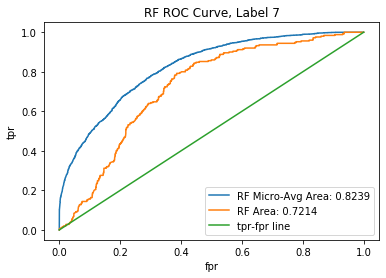

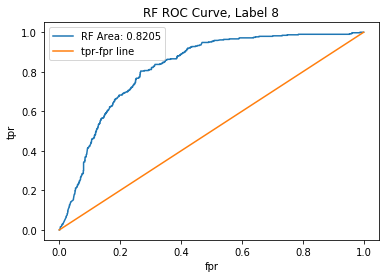

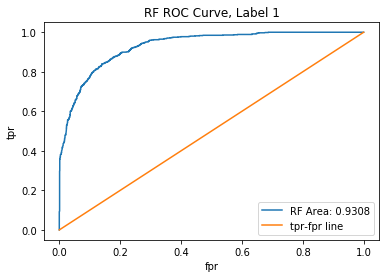

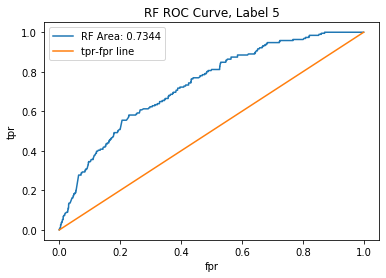

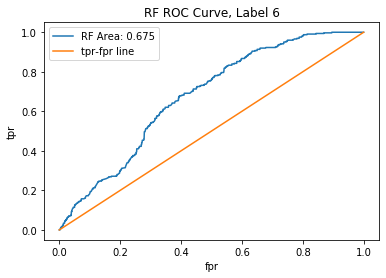

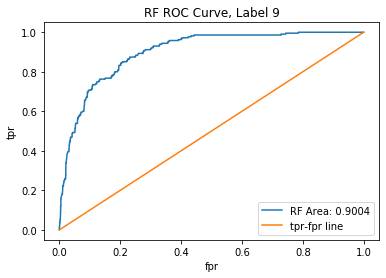

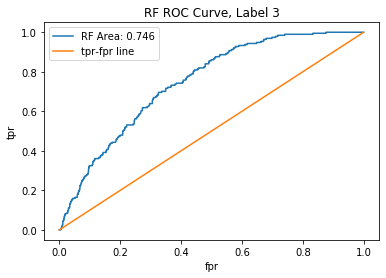

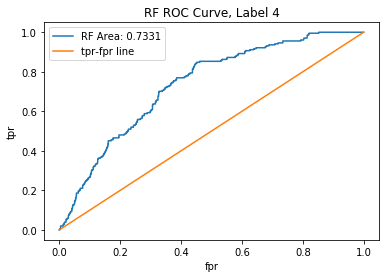

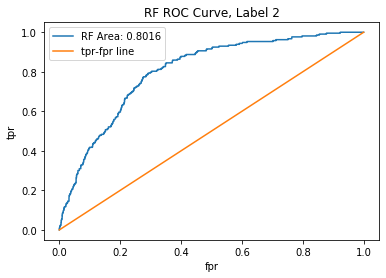

In [38]:
runRandomForest(X_train3, y_train3, X_test3, y_test3)

## SVM for DS3

SVM linear Kernel results
_________________________________________
Keys: dict_keys([8, 1, 4, 9, 6, 7, 2, 3])
Values: dict_values([730, 1038, 159, 117, 337, 240, 56, 16])
Labels: [8, 1, 4, 9, 6, 7, 2, 3]

SVM linear Kernel Accuracy Score: 0.2636464909023394

SVM linear Kernel Confusion Matrix

[[401  10   3  12   0  11  24  10  10]
 [190  14   1  12   0  27 145  14   0]
 [ 54   8   4  28   0  37  10  22   0]
 [148   9   4  28   0  42   9  44   7]
 [ 48   5   1  35   0  35   6  48  69]
 [ 43   5   0  19   0  58   8 101   8]
 [ 39   3   1  13   0  59  10 120   0]
 [ 64   2   2  11   0  55  16 192  20]
 [ 51   0   0   1   0  13  12 179   3]]


		    SVM linear Kernel Classification Report

              precision    recall  f1-score   support

           1       0.39      0.83      0.53       481
           2       0.25      0.03      0.06       403
           3       0.25      0.02      0.04       163
           4       0.18      0.10      0.12       291
           5       0.00      0.00

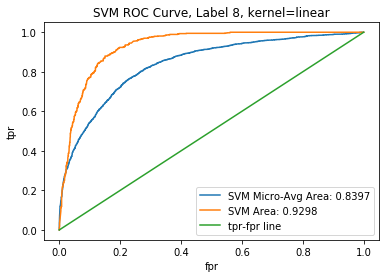

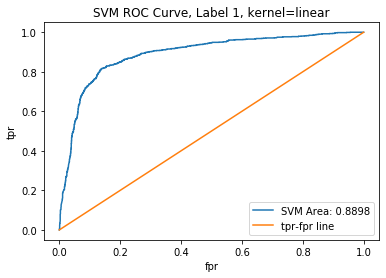

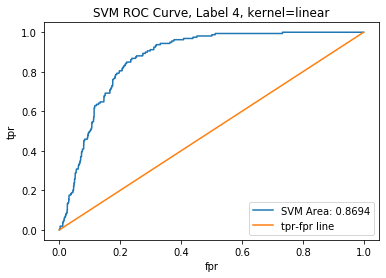

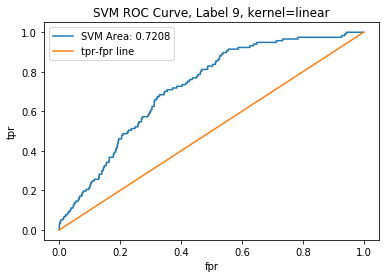

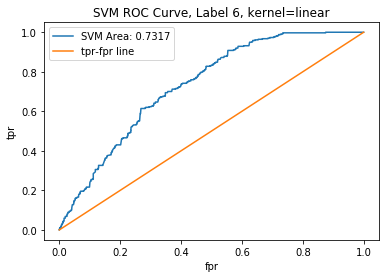

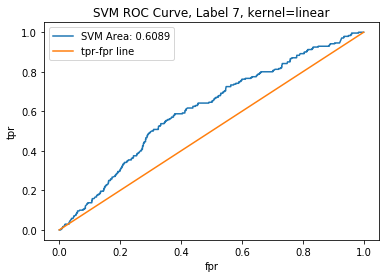

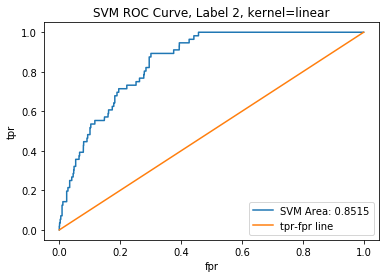

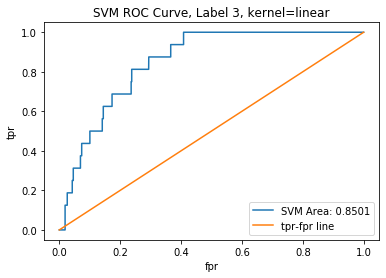

SVM poly Kernel results
_________________________________________
Keys: dict_keys([9, 7, 1, 5, 2, 8, 4, 6, 3])
Values: dict_values([392, 212, 584, 120, 218, 433, 337, 294, 103])
Labels: [9, 7, 1, 5, 2, 8, 4, 6, 3]

SVM poly Kernel Accuracy Score: 0.33011511325659115

SVM poly Kernel Confusion Matrix

[[352  42  15  13   2   6  12  10  29]
 [ 46  83  12  75  10  18  10   4 145]
 [ 29  27  36  19   8  25   6   9   4]
 [ 36  23  13  49  15  24  66  27  38]
 [ 18  10   8 103  31  35  15  21   6]
 [ 21  18  12  17  13  62  22  58  19]
 [ 23   6   4  15  13  51  46  63  24]
 [ 30   6   2  42   9  55  27 147  44]
 [ 29   3   1   4  19  18   8  94  83]]


		    SVM poly Kernel Classification Report

              precision    recall  f1-score   support

           1       0.60      0.73      0.66       481
           2       0.38      0.21      0.27       403
           3       0.35      0.22      0.27       163
           4       0.15      0.17      0.16       291
           5       0.26     

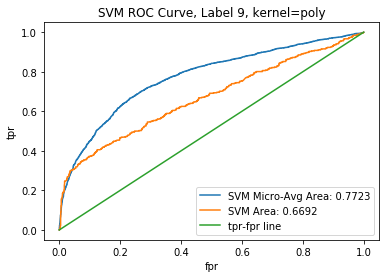

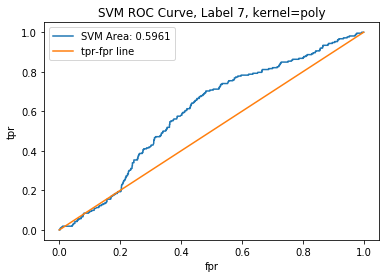

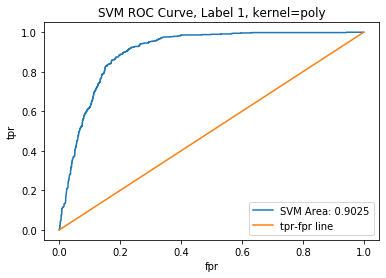

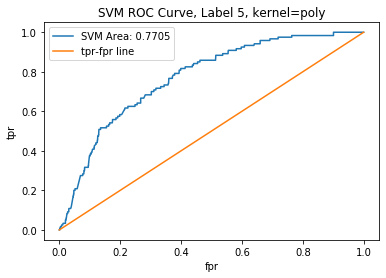

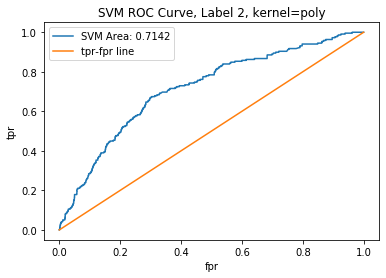

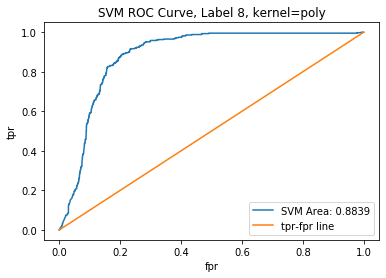

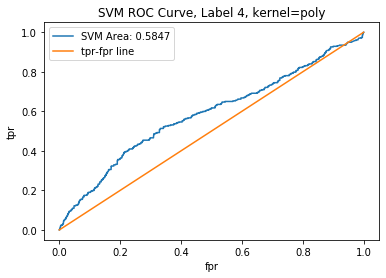

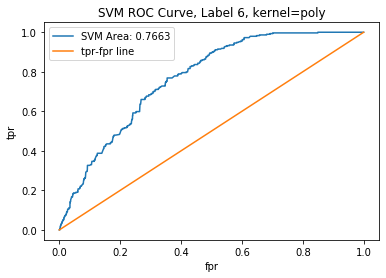

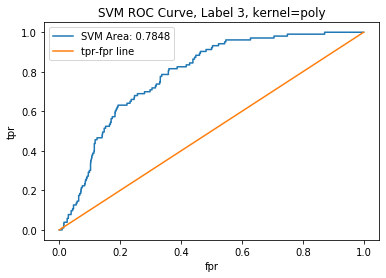

In [39]:
kernels = ['linear', 'poly']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, X_train3, y_train3, X_test3, y_test3)

## Dataset 4

In [40]:
printShapes(X_train4=X_train4.shape, X_test4=X_test4.shape, y_train4=y_train4.shape)

printHeads(X_train4=X_train4.head(), X_test4=X_test4.head(), y_train4=y_train4.head())

X_train4 Shape: (2547, 112)

X_test4 Shape: (1092, 112)

y_train4 Shape: (2547, 1)

X_train4 Head:        0        1        2         3         4         5        6         7    \
0 -0.44987 -0.20049 -0.48729 -0.061085 -0.051024 -0.021653  0.30788 -0.057097   
1 -0.52843 -0.25912 -0.42584 -0.061339 -0.075853 -0.027442  0.30166 -0.064007   
2 -0.49823 -0.26346 -0.40683 -0.050683 -0.066742 -0.024397  0.27500 -0.130610   
3 -0.42405 -0.18392 -0.33761 -0.035511 -0.048362 -0.008383  0.23487 -0.197570   
4 -0.21487 -0.24508 -0.25204 -0.111790 -0.045751 -0.035225  0.21666 -0.216510   

        8        9    ...       102       103     104     105     106     107  \
0 -0.015610  0.13241  ...    4.5912   23.2100  146.23 -178.08  152.01 -129.72   
1 -0.042905  0.33057  ...    9.7736   -4.6825  103.02 -182.73  168.97 -151.29   
2 -0.105670  0.28596  ...   38.8230  -53.3400  161.33 -180.05  151.52 -127.85   
3 -0.075233  0.13323  ...   81.5990  -93.0770  145.09  172.44 -196.78 -135.79   
4 -0.0852

In [41]:
X_test4.tail()

0         1         2         3         4         5         6    \
1087 -0.042106 -0.060041 -0.052885 -0.066470 -0.046249 -0.080368  0.039437   
1088 -0.075579 -0.057300 -0.054729 -0.098470 -0.094048 -0.067433  0.001865   
1089 -0.046965 -0.070540 -0.058407 -0.105140 -0.128010 -0.080368  0.009211   
1090 -0.053778 -0.025624 -0.049878 -0.093137 -0.107260 -0.051512  0.025017   
1091 -0.086850 -0.088063 -0.104710 -0.145800 -0.158830 -0.080368  0.036635   

          7        8         9    ...     102     103     104     105     106  \
1087 -0.37812 -0.30987  0.070089  ...  171.26 -177.65  175.35  141.95 -145.25   
1088 -0.38659 -0.29077  0.085219  ...  175.34 -195.36  180.89  158.21 -215.23   
1089 -0.38623 -0.30120  0.101070  ...  189.89 -205.38  186.58  172.02 -139.57   
1090 -0.39009 -0.29406  0.078960  ...  183.00 -176.71  184.49  145.63 -141.06   
1091 -0.39016 -0.32705  0.089560  ...  198.30 -221.31  188.51  184.50 -221.56   

          107     108     109     110     111  
1087  195.870 -220.17  203.51 -185.19  190.42  
1088  -84.344  105.40  205.39 -191.70  195.67  
1089  105.950 -142.26  143.56 -125.91  178.52  
1090  211.050 -204.05  184.96 -204.15  188.35  
1091  197.830 -179.47  167.73 -140.18  172.17  

[5 rows x 112 columns]

## KNN for DS4

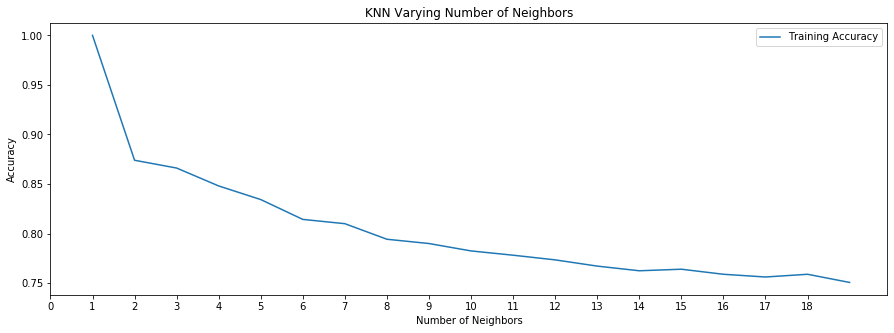

In [42]:
neighbors4, train_accuracy4 = testK(X_train4, y_train4)
plotTestK(neighbors4, train_accuracy4, [15,5])

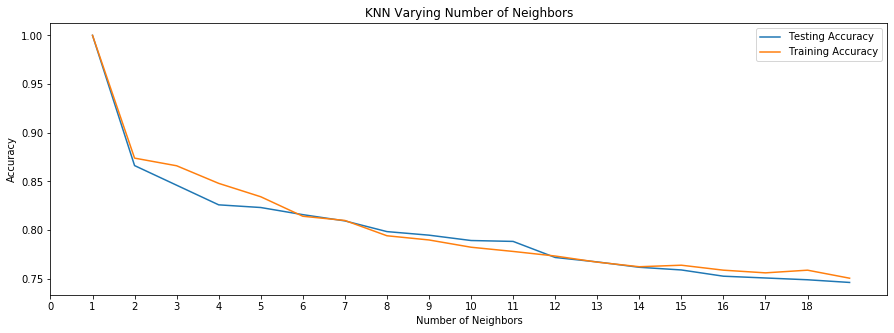

In [43]:
y_test4 = getTestLabelsKNN(1, X_train4, y_train4, X_test4)
n4, test_acc4, train_acc4 = optimizeK(X_train4, y_train4, X_test4, y_test4, 20)
plotK(n4, test_acc4, train_acc4, [15, 5])

In [44]:
knn_score4, knn_y_pred4 = runKNN(5, X_train4, y_train4, X_test4, y_test4)
print(f'Accuracy: {knn_score4}')

Accuracy: 0.8232600732600732


In [45]:
knn_keys4, knn_vals4, knn_labels4 = countUniqueValues(knn_y_pred4)

Keys: dict_keys([1, 2, 3, 4, 5, 6, 8, 7, 9])
Values: dict_values([115, 134, 142, 120, 106, 123, 123, 122, 107])
Labels: [1, 2, 3, 4, 5, 6, 8, 7, 9]


KNN Accuracy Score, k=5: 0.8232600732600732

KNN Confusion Matrix, k=5

[[ 93   9   2  12   0   1   1   1   0]
 [  5 107   9   2   2   0   1   0   0]
 [  5   9 116   2   3   3   0   0   2]
 [  7   4   6  97   9   0   0   0   1]
 [  1   3   3   5  75  12   0   0   0]
 [  1   0   1   0  14 101   6   0   1]
 [  1   0   1   1   0   2 105   8   4]
 [  1   0   2   0   0   0   3 109   3]
 [  1   2   2   1   3   4   6   5  96]]

		  KNN Classification Report, k=5

              precision    recall  f1-score   support

           1       0.81      0.78      0.79       119
           2       0.80      0.85      0.82       126
           3       0.82      0.83      0.82       140
           4       0.81      0.78      0.80       124
           5       0.71      0.76      0.73        99
           6       0.82      0.81      0.82       124
           7       0.86      0.86      0.86       122
           8       0.89      0.92      0.90       118
           9       0.90      0.80      0.85       12

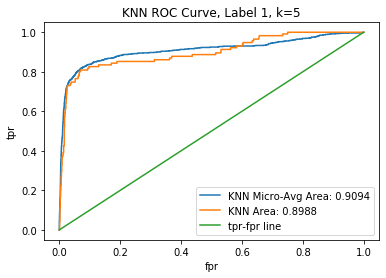

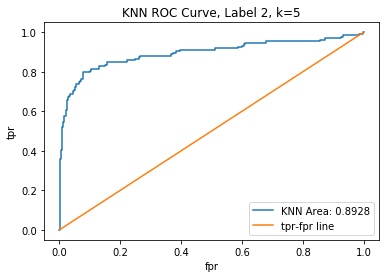

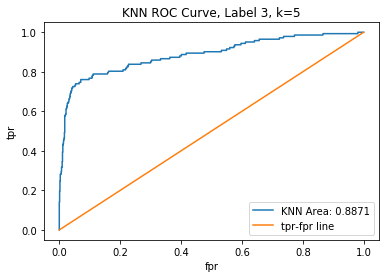

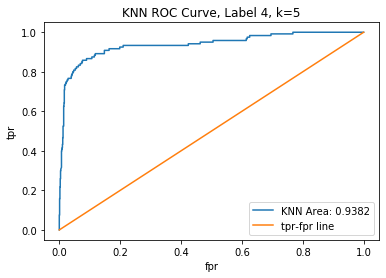

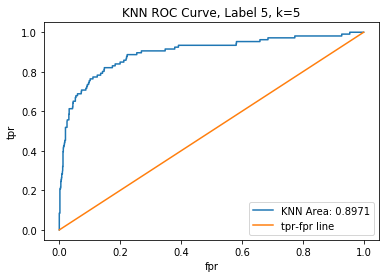

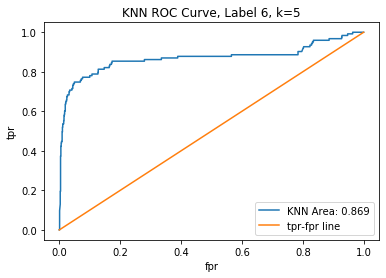

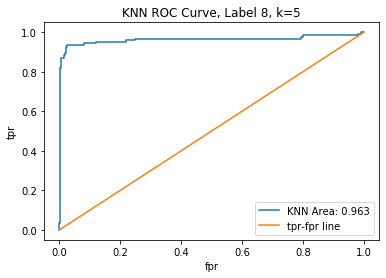

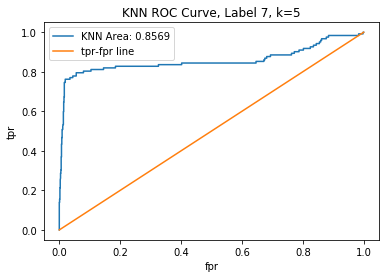

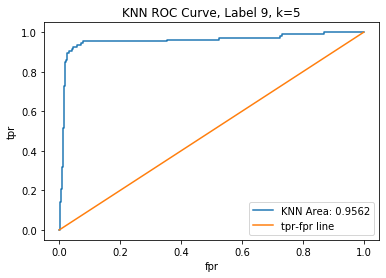

In [46]:
n_neighbors4=5
getScoresKNN(n_neighbors4, y_test4, knn_y_pred4)
pd.crosstab(y_test4, knn_y_pred4, rownames=['True'], colnames=['Predicted'], margins=True)
calcMultiClassROCAUC(X_train4, y_train4, X_test4, knn_y_pred4, model='KNN', tuner='k',\
 tuner_val=n_neighbors4, labels=knn_labels4, dec=False)

## LR for DS4

In [47]:
c4 = 20
lr_cma4, lr_cr4, lr_acc4, lr_y_pred4, ky4, val4 = runLogisticRegression(c4, X_train4, y_train4, X_test4, y_test4)
print(f'Logistic Regression Highest Accuracy Score, C={ky4}: {val4}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma4[ky4]}\n')

Logistic Regression Highest Accuracy Score, C=3: 0.6282051282051282

Logistic Regression Most Accurate Confusion Matrix

[[59 17 10 11  1  3  1 10  7]
 [19 68 16  2  3  6  4  1  7]
 [ 7  9 92  8  5  9  5  2  3]
 [11  3  4 89  6  1  3  2  5]
 [ 3  5  6  5 60 13  1  3  3]
 [ 1  4 11  1 18 76  7  2  4]
 [ 4  2  1  1  3  6 84 12  9]
 [ 3  3  3  0  6  2 13 78 10]
 [ 1  2  4  2  0  6  4 21 80]]



In [48]:
pd.crosstab(y_test4, lr_y_pred4[ky4], rownames=['True'], colnames=['Predicted'], margins=True)
print(f'\n\t   Logistic Regression Classification Report C={ky4}\n\n{lr_cr4[ky4]}')


	   Logistic Regression Classification Report C=3

              precision    recall  f1-score   support

           1       0.55      0.50      0.52       119
           2       0.60      0.54      0.57       126
           3       0.63      0.66      0.64       140
           4       0.75      0.72      0.73       124
           5       0.59      0.61      0.60        99
           6       0.62      0.61      0.62       124
           7       0.69      0.69      0.69       122
           8       0.60      0.66      0.63       118
           9       0.62      0.67      0.65       120

    accuracy                           0.63      1092
   macro avg       0.63      0.63      0.63      1092
weighted avg       0.63      0.63      0.63      1092



In [49]:
lr_keys4, lr_vals4, lr_labels4 = countUniqueValues(lr_y_pred4[ky4])

Keys: dict_keys([1, 9, 8, 2, 6, 3, 4, 5, 7])
Values: dict_values([108, 128, 131, 113, 122, 147, 119, 102, 122])
Labels: [1, 9, 8, 2, 6, 3, 4, 5, 7]


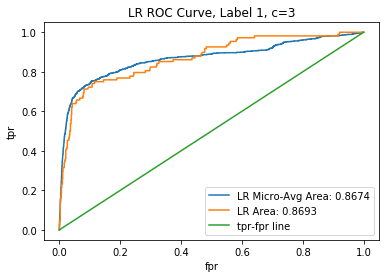

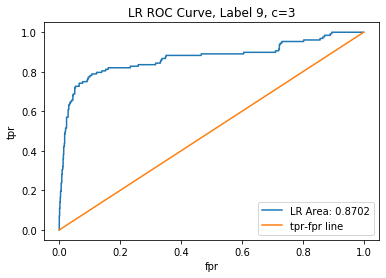

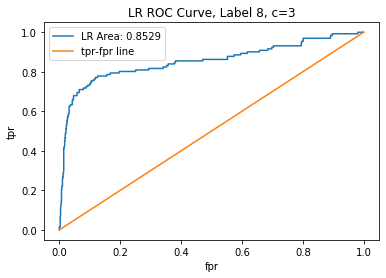

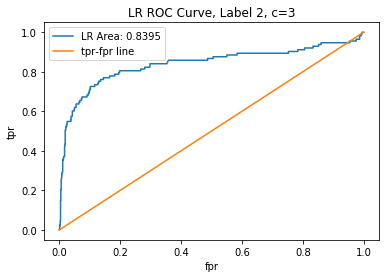

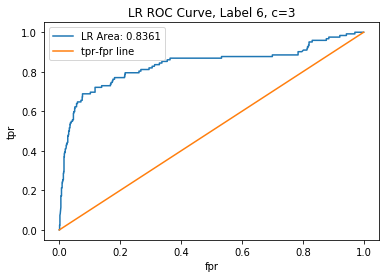

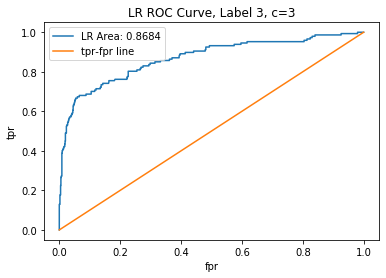

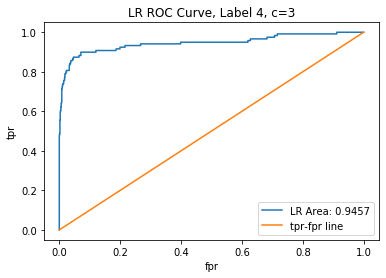

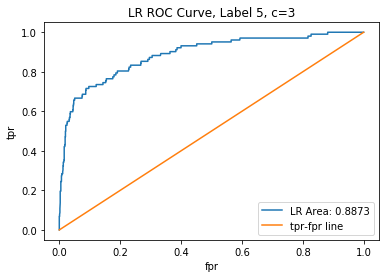

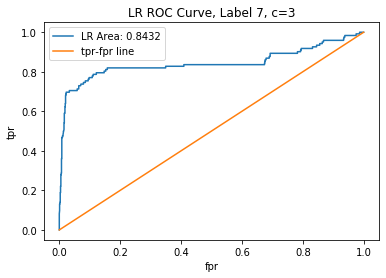

In [50]:
calcMultiClassROCAUC(X_train4, y_train4, X_test4, lr_y_pred4[ky4], model='LR', tuner='c', tuner_val=ky4, labels=lr_labels4, dec=False)

## Random Forest for DS4

Keys: dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])
Values: dict_values([118, 124, 140, 124, 116, 118, 111, 114, 127])
Labels: [1, 2, 3, 4, 5, 6, 7, 8, 9]

Random Forest Accuracy Score: 0.7472527472527473

Random Forest Confusion Matrix

[[ 92   9   2  12   0   1   2   1   0]
 [  8  90  16   5   2   1   1   1   2]
 [  4  15 103   2  14   0   0   0   2]
 [ 11   4   8  93   5   2   0   0   1]
 [  0   3   4   7  62  20   2   1   0]
 [  1   1   4   0  26  83   4   0   5]
 [  1   2   0   1   3   5  91   6  13]
 [  0   0   1   2   0   2   7 102   4]
 [  1   0   2   2   4   4   4   3 100]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.78      0.77      0.78       119
           2       0.73      0.71      0.72       126
           3       0.74      0.74      0.74       140
           4       0.75      0.75      0.75       124
           5       0.53      0.63      0.58        99
           6       0.70      0.67      0.69       1

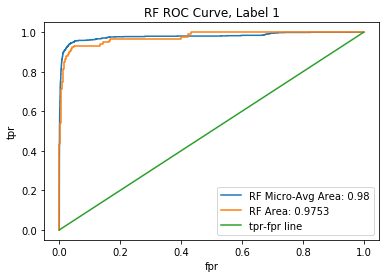

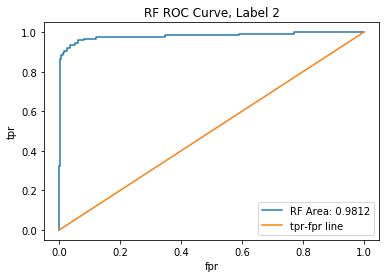

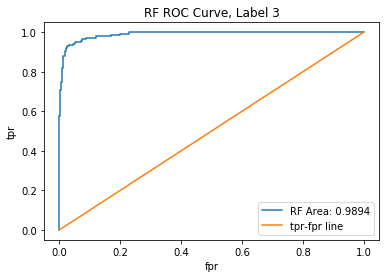

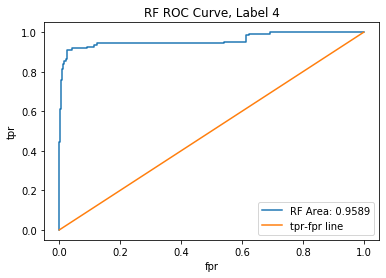

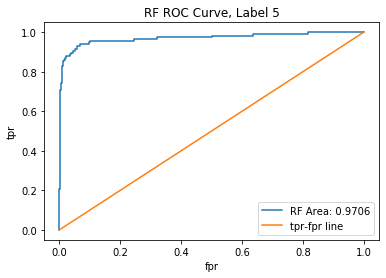

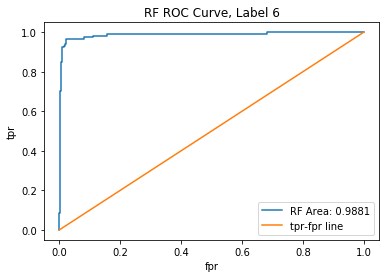

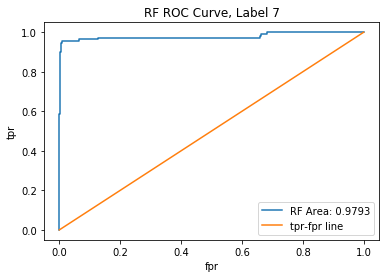

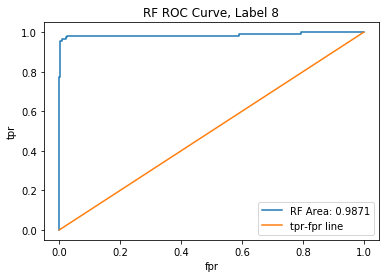

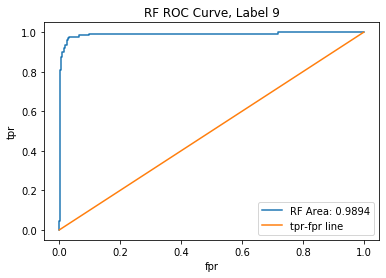

In [51]:
runRandomForest(X_train4, y_train4, X_test4, y_test4)

## SVM for DS4

## Dataset 5

In [52]:
printShapes(X_train5=X_train5.shape, X_test5=X_test5.shape, y_train5=y_train5.shape)
printHeads(X_train5=X_train5.head(), X_test5=X_test5.head(), y_train4=y_train5.head())

X_train5 Shape: (1119, 11)

X_test5 Shape: (480, 11)

y_train5 Shape: (1119, 1)

X_train5 Head:      0     1     2    3      4     5     6       7     8     9    10
0   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4
1   7.8  0.88  0.00  2.6  0.098  25.0  67.0  0.9968  3.20  0.68  9.8
2   7.8  0.76  0.04  2.3  0.092  15.0  54.0  0.9970  3.26  0.65  9.8
3  11.2  0.28  0.56  1.9  0.075  17.0  60.0  0.9980  3.16  0.58  9.8
4   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4

X_test5 Head:     0     1     2    3      4     5      6       7     8     9     10
0  7.9  0.60  0.06  1.6  0.069  15.0   59.0  0.9964  3.30  0.46   9.4
1  7.5  0.50  0.36  6.1  0.071  17.0  102.0  0.9978  3.35  0.80  10.5
2  7.8  0.61  0.29  1.6  0.114   9.0   29.0  0.9974  3.26  1.56   9.1
3  8.5  0.28  0.56  1.8  0.092  35.0  103.0  0.9969  3.30  0.75  10.5
4  8.1  0.56  0.28  1.7  0.368  16.0   56.0  0.9968  3.11  1.28   9.3

y_train4 Head:    0
0  5
1  5
2  5
3  6
4  5



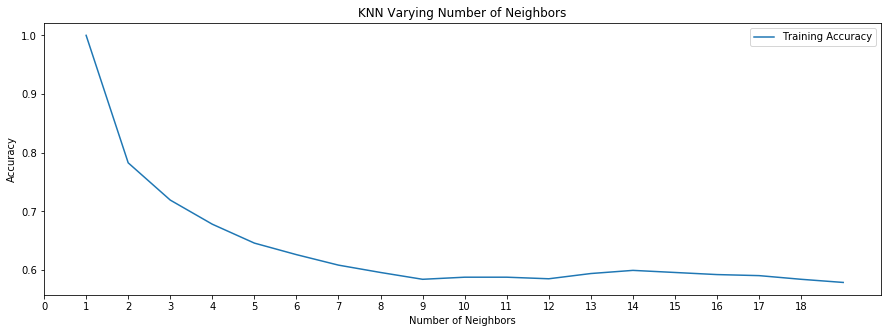

In [53]:
n_neighbors5, train_accuracy5 = testK(X_train5, y_train5)
plotTestK(n_neighbors5, train_accuracy5, [15, 5])

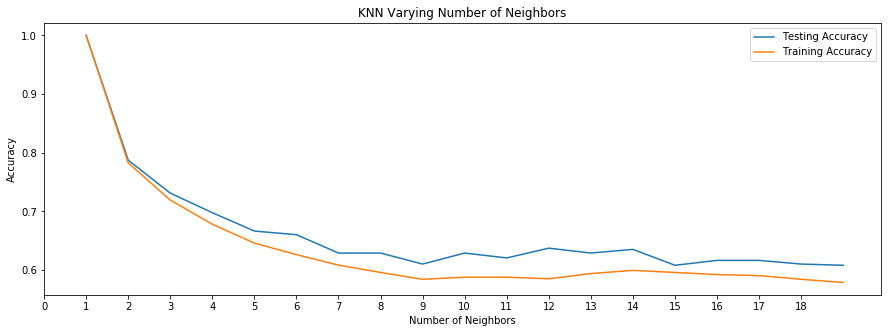

In [54]:
y_test5 = getTestLabelsKNN(1, X_train5, y_train5, X_test5)
n5, test_acc5, train_acc5 = optimizeK(X_train5, y_train5, X_test5, y_test5, 20)
plotK(n5, test_acc5, train_acc5, [15, 5])

In [55]:
n_neighbors5=15
knn_score5, knn_y_pred5 = runKNN(n_neighbors5, X_train5, y_train5, X_test5, y_test5)
print(f'Accuracy: {knn_score5}')

Accuracy: 0.6083333333333333


In [56]:
getScoresKNN(n_neighbors5, y_test5, knn_y_pred5)
pd.crosstab(y_test5, knn_y_pred5, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Accuracy Score, k=15: 0.6083333333333333

KNN Confusion Matrix, k=15

[[  0   0   1   1   0   0]
 [  0   0   9   1   1   0]
 [  0   0 158  61   5   0]
 [  0   0  61 120  11   0]
 [  0   0   6  26  14   0]
 [  0   0   2   3   0   0]]

		  KNN Classification Report, k=15

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.71      0.69       224
           6       0.57      0.62      0.59       192
           7       0.45      0.30      0.36        46
           8       0.00      0.00      0.00         5

    accuracy                           0.61       480
   macro avg       0.28      0.27      0.27       480
weighted avg       0.58      0.61      0.59       480



Predicted    5    6   7  All
True                        
3            1    1   0    2
4            9    1   1   11
5          158   61   5  224
6           61  120  11  192
7            6   26  14   46
8            2    3   0    5
All        237  212  31  480

In [57]:
knn_keys5, knn_vals5, knn_labels5 = countUniqueValues(knn_y_pred5)

Keys: dict_keys([5, 6, 7])
Values: dict_values([237, 212, 31])
Labels: [5, 6, 7]


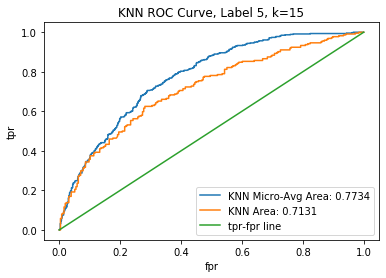

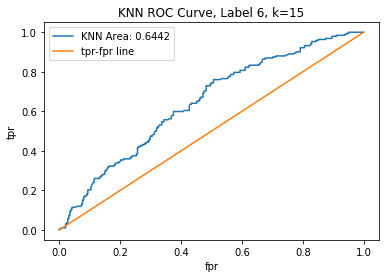

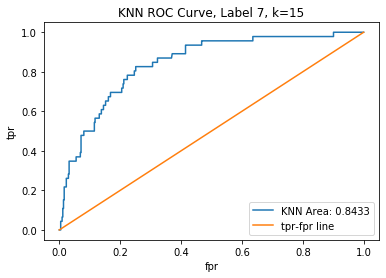

In [58]:
calcMultiClassROCAUC(X_train5, y_train5, X_test5, y_test5, model='KNN', tuner='k',\
 tuner_val=n_neighbors5, labels=knn_labels5, dec=False)

In [59]:
c5 = 20
lr_cma5, lr_cr5, lr_acc5, lr_y_pred5, ky5, val5 = runLogisticRegression(c5, X_train5, y_train5, X_test5, y_test5)
print(f'Logistic Regression Highest Accuracy Score, C={ky5}: {val5}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma4[ky5]}\n')
pd.crosstab(y_test5, lr_y_pred5[ky5], rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression Highest Accuracy Score, C=3: 0.6

Logistic Regression Most Accurate Confusion Matrix

[[59 17 10 11  1  3  1 10  7]
 [19 68 16  2  3  6  4  1  7]
 [ 7  9 92  8  5  9  5  2  3]
 [11  3  4 89  6  1  3  2  5]
 [ 3  5  6  5 60 13  1  3  3]
 [ 1  4 11  1 18 76  7  2  4]
 [ 4  2  1  1  3  6 84 12  9]
 [ 3  3  3  0  6  2 13 78 10]
 [ 1  2  4  2  0  6  4 21 80]]



Predicted    5    6   7  All
True                        
3            1    1   0    2
4           11    0   0   11
5          156   64   4  224
6           65  124   3  192
7            4   34   8   46
8            0    5   0    5
All        237  228  15  480

In [60]:
print(f'\n\t   Logistic Regression Classification Report C={ky5}\n\n{lr_cr5[ky5]}')


	   Logistic Regression Classification Report C=3

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.70      0.68       224
           6       0.54      0.65      0.59       192
           7       0.53      0.17      0.26        46
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.29      0.25      0.25       480
weighted avg       0.58      0.60      0.58       480



Keys: dict_keys([5, 6, 7])
Values: dict_values([237, 228, 15])
Labels: [5, 6, 7]


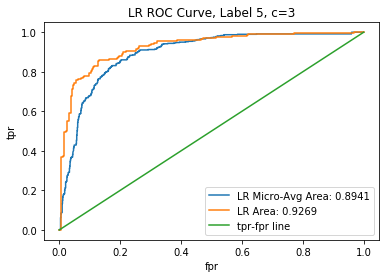

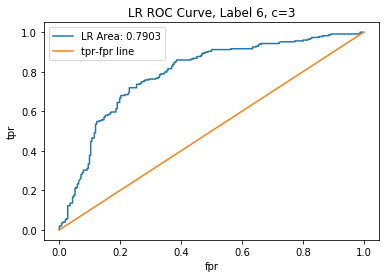

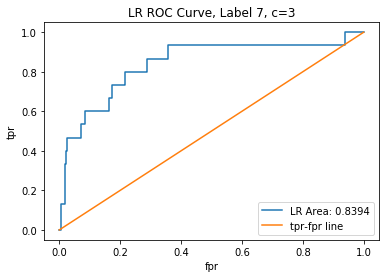

In [61]:
lr_keys5, lr_vals5, lr_labels5 = countUniqueValues(lr_y_pred5[ky5])
calcMultiClassROCAUC(X_train5, y_train5, X_test5, lr_y_pred5[ky5], model='LR', tuner='c', tuner_val=ky5, labels=lr_labels5, dec=False)

Keys: dict_keys([5, 6, 7, 4, 8, 3])
Values: dict_values([227, 204, 45, 1, 2, 1])
Labels: [5, 6, 7, 4, 8, 3]

Random Forest Accuracy Score: 0.64375

Random Forest Confusion Matrix

[[  0   0   2   0   0   0]
 [  1   0   9   1   0   0]
 [  0   0 159  58   7   0]
 [  0   1  53 124  12   2]
 [  0   0   3  17  26   0]
 [  0   0   1   4   0   0]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.71      0.71       224
           6       0.61      0.65      0.63       192
           7       0.58      0.57      0.57        46
           8       0.00      0.00      0.00         5

    accuracy                           0.64       480
   macro avg       0.31      0.32      0.32       480
weighted avg       0.63      0.64      0.63       480



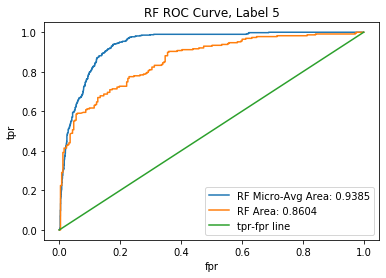

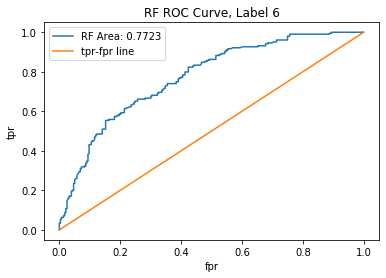

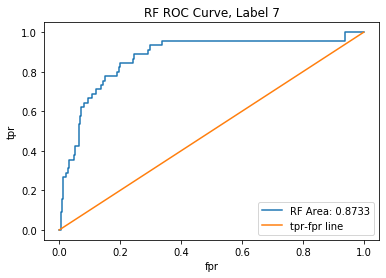

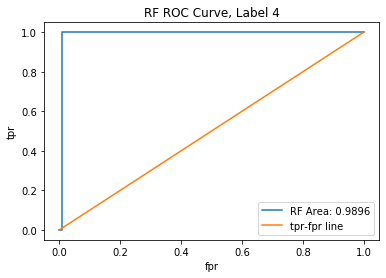

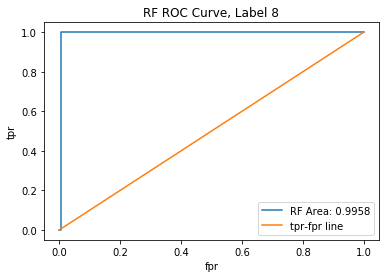

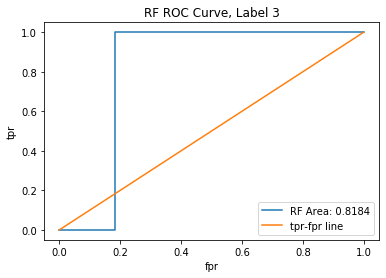

In [62]:
runRandomForest(X_train5, y_train5, X_test5, y_test5)

# Dataset 6

In [63]:
printShapes(X_train6=X_train6.shape, X_test6=X_test6.shape, y_train6=y_train6.shape)
printHeads(X_train6=X_train6.head(), X_test6=X_test6.head(), y_train6=y_train6.head())

X_train6 Shape: (612, 142)

X_test6 Shape: (262, 142)

y_train6 Shape: (612, 1)

X_train6 Head:     0      1    2     3     4     5     6     7     8     9    ...   132  133  \
0  74.0  190.0  1.0  18.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   1.0  0.0   
1  74.0  207.0  1.0  15.0  79.0   2.0  15.0   6.0   9.0  17.0  ...  98.0 -0.2   
2  72.0  218.0  1.0   7.0  65.0  19.0  26.0  13.0  13.0  45.0  ...  70.0  3.7   
3  77.0  220.0  1.0   3.0  30.0   1.0   5.0   5.0   0.0   6.0  ...  22.0  0.0   
4  76.0  217.0  1.0  16.0  82.0   7.0  12.0   4.0   8.0  19.0  ...  68.0 -0.1   

   134  135      136    137   138    139   140   141  
0 -0.2 -0.2    40.03    1.0   0.0  175.7  -0.4 -0.38  
1  3.4  3.2  2850.59  290.0  13.3  112.5  14.1  0.18  
2  1.3  5.0  2486.75  102.0   6.6  114.8  36.8  0.57  
3  0.4  0.5  1074.41  130.0  17.5  105.1   5.9  0.20  
4  1.4  1.3  3459.09  425.0   8.3   99.5  21.8  0.27  

[5 rows x 142 columns]

X_test6 Head:     0      1    2      3     4     5     6    7 

In [64]:
X_train6_cmp, X_test6_cmp = trainPCA(X_train6, X_test6)

X_train Variance: 1.0000000000000002
X_train Shape: (612, 142)
X_train Variance: 1.0000000000000002
X_train Shape: (262, 142)


In [65]:
printShapes(X_train6_cmp=X_train6_cmp.shape, X_test6_cmp=X_test6_cmp.shape)

X_train6_cmp Shape: (612, 142)

X_test6_cmp Shape: (262, 142)



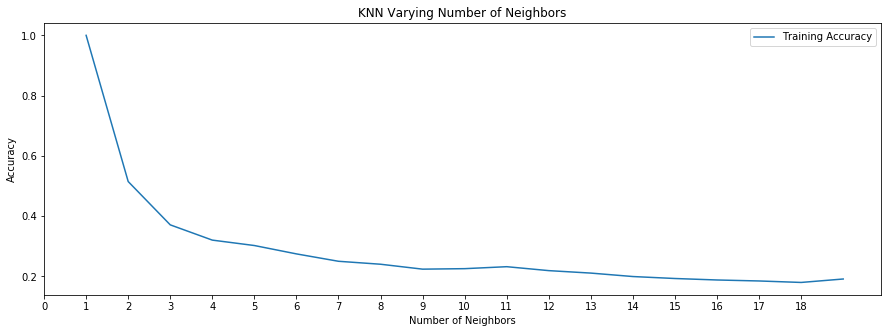

In [66]:
n_neighbors6, train_accuracy6 = testK(X_train6_cmp, y_train6)
plotTestK(n_neighbors6, train_accuracy6, [15, 5])

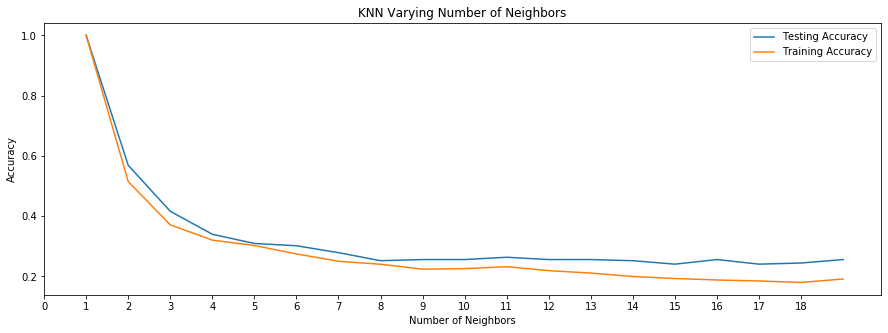

In [67]:
y_test6 = getTestLabelsKNN(1, X_train6_cmp, y_train6, X_test6_cmp)
n6, test_acc6, train_acc6 = optimizeK(X_train6_cmp, y_train6, X_test6_cmp, y_test6, 20)
plotK(n6, test_acc6, train_acc6, [15, 5])

In [68]:
n_neighbors6=8
knn_score6, knn_y_pred6 = runKNN(n_neighbors6, X_train6_cmp, y_train6, X_test6_cmp, y_test6)
print(f'Accuracy: {knn_score6}')

Accuracy: 0.25190839694656486


In [69]:
getScoresKNN(n_neighbors6, y_test6, knn_y_pred6)
pd.crosstab(y_test6, knn_y_pred6, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Accuracy Score, k=8: 0.25190839694656486

KNN Confusion Matrix, k=8

[[11  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]]

		  KNN Classification Report, k=8

              precision    recall  f1-score   support

    575000.0       0.30      0.52      0.38        21
    590000.0       0.00      0.00      0.00         0
    595000.0       0.00      0.00      0.00         0
    600000.0       0.24      0.68      0.36        19
    620000.0       0.00      0.00      0.00         3
    625000.0       0.00      0.00      0.00         1
    640000.0       0.00      0.00      0.00         1
    645000.0       0.00      0.00      0.00         1
    650000.0       0.50      0.50      0.50         8
    667500.0       1.00      0.25      0.40         4
    670000.0       0.00      0.00      0.00         3
    675000.0       0.00      0.00      0.00         1
    680000.0       0.00      0.

Predicted  575000.0  590000.0  595000.0  600000.0  625000.0  640000.0  \
True                                                                    
575000.0         11         0         0         3         0         0   
600000.0          4         0         0        13         0         0   
620000.0          0         0         0         1         0         0   
625000.0          1         0         0         0         0         0   
640000.0          1         0         0         0         0         0   
...             ...       ...       ...       ...       ...       ...   
6500000.0         0         0         0         0         0         0   
7000000.0         0         0         0         0         0         0   
7450000.0         0         0         0         0         0         0   
7500000.0         0         0         0         0         0         0   
All              37         3         1        54         2         8   

Predicted  650000.0  667500.0  670000.0  700000.0  ...  2250000.0  2500000.0  \
True                                               ...                         
575000.0          0         0         0         0  ...          0          0   
600000.0          2         0         0         0  ...          0          0   
620000.0          0         0         0         0  ...          0          0   
625000.0          0         0         0         0  ...          0          0   
640000.0          0         0         0         0  ...          0          0   
...             ...       ...       ...       ...  ...        ...        ...   
6500000.0         0         0         0         0  ...          0          0   
7000000.0         0         0         0         0  ...          0          0   
7450000.0         0         0         0         0  ...          0          0   
7500000.0         0         0         0         0  ...          1          0   
All               8         1         2         5  ...          3          6   

Predicted  2750000.0  3500000.0  3575000.0  4000000.0  5000000.0  6000000.0  \
True                                                                          
575000.0           0          0          0          0          0          0   
600000.0           0          0          0          0          0          0   
620000.0           0          0          0          0          0          0   
625000.0           0          0          0          0          0          0   
640000.0           0          0          0          0          0          0   
...              ...        ...        ...        ...        ...        ...   
6500000.0          1          0          0          0          0          0   
7000000.0          0          1          0          0          0          0   
7450000.0          0          0          0          0          0          0   
7500000.0          0          0          0          0          0          0   
All                1          3          1          5          9          3   

Predicted  7000000.0  All  
True                       
575000.0           0   21  
600000.0           0   19  
620000.0           0    3  
625000.0           0    1  
640000.0           0    1  
...              ...  ...  
6500000.0          0    1  
7000000.0          1    4  
7450000.0          1    1  
7500000.0          0    1  
All                4  262  

[74 rows x 33 columns]

Keys: dict_keys([2250000.0, 575000.0, 925000.0, 750000.0, 800000.0, 600000.0, 950000.0, 832500.0, 1000000.0, 5000000.0, 590000.0, 1250000.0, 670000.0, 6000000.0, 640000.0, 625000.0, 700000.0, 3575000.0, 2500000.0, 725000.0, 7000000.0, 4000000.0, 825000.0, 742500.0, 792500.0, 650000.0, 667500.0, 3500000.0, 2750000.0, 1200000.0, 595000.0, 1300000.0])
Values: dict_values([3, 37, 67, 8, 2, 54, 7, 4, 1, 9, 3, 4, 2, 3, 8, 2, 5, 1, 6, 2, 4, 5, 4, 2, 2, 8, 1, 3, 1, 1, 1, 2])
Labels: [2250000.0, 575000.0, 925000.0, 750000.0, 800000.0, 600000.0, 950000.0, 832500.0, 1000000.0, 5000000.0, 590000.0, 1250000.0, 670000.0, 6000000.0, 640000.0, 625000.0, 700000.0, 3575000.0, 2500000.0, 725000.0, 7000000.0, 4000000.0, 825000.0, 742500.0, 792500.0, 650000.0, 667500.0, 3500000.0, 2750000.0, 1200000.0, 595000.0, 1300000.0]


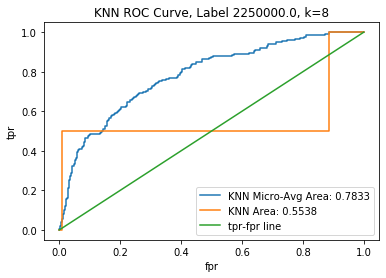

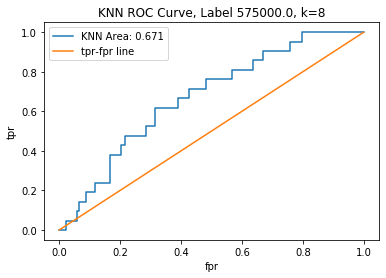

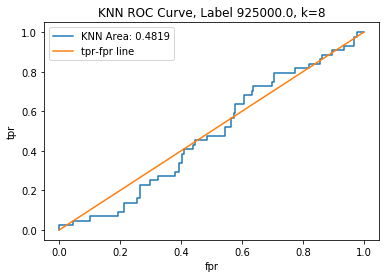

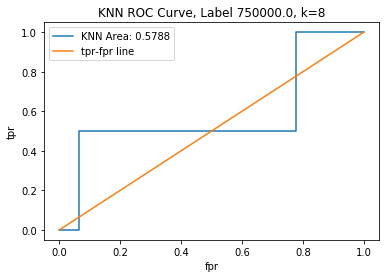

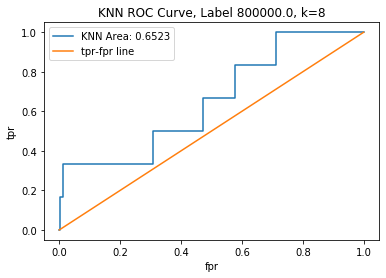

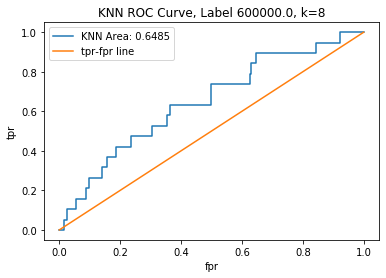

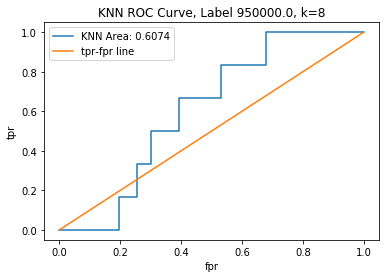

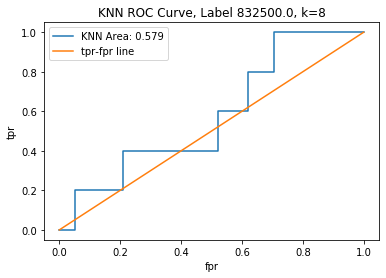

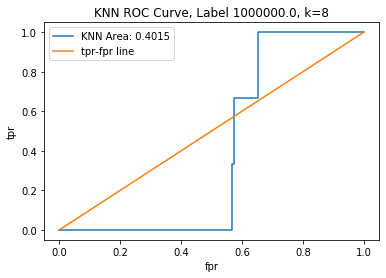

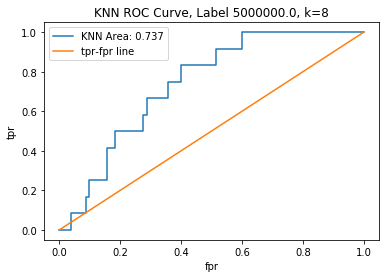

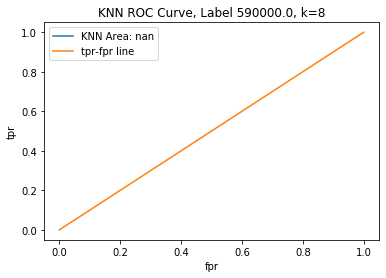

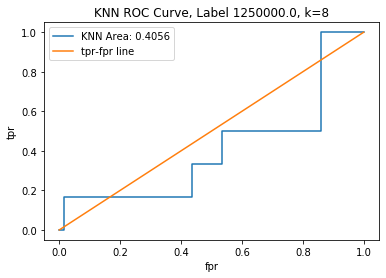

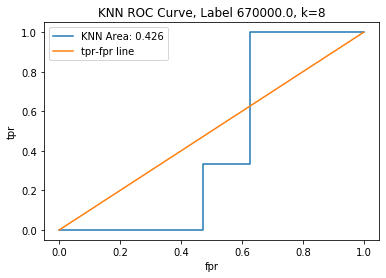

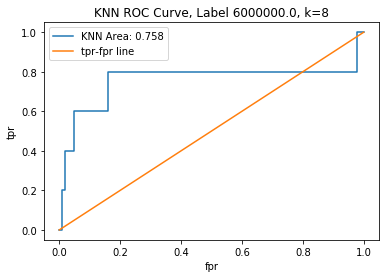

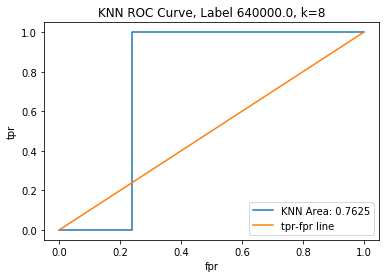

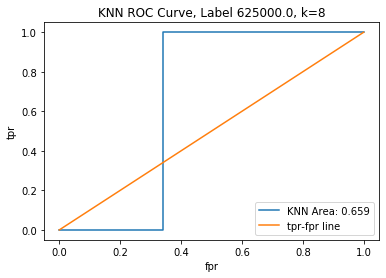

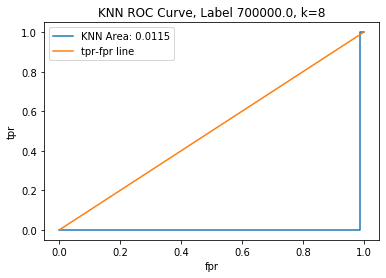

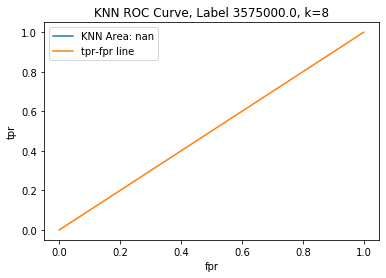

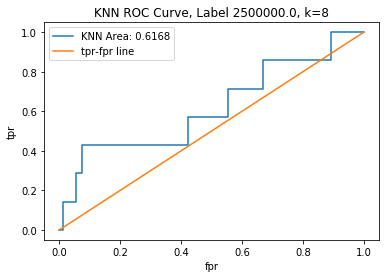

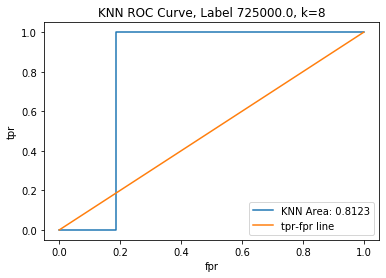

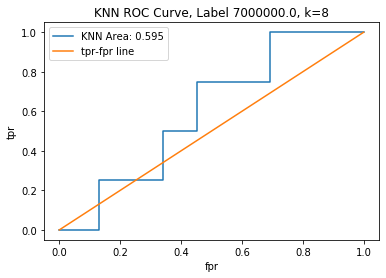

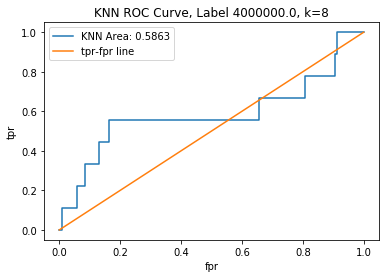

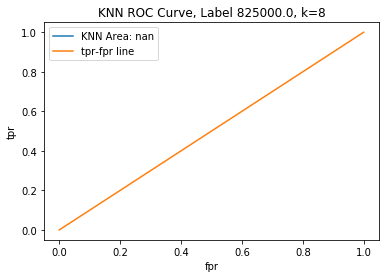

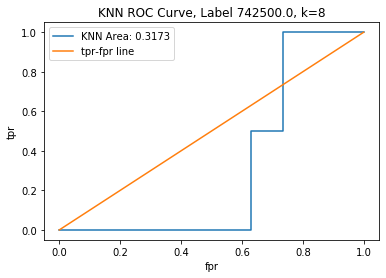

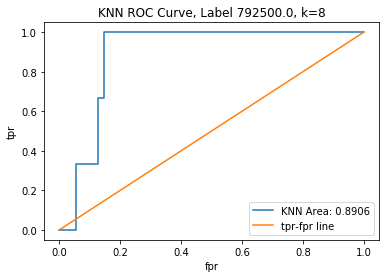

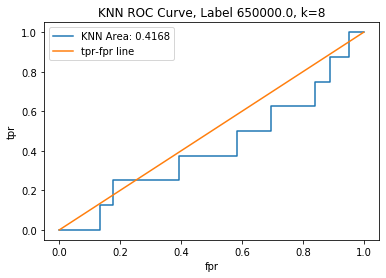

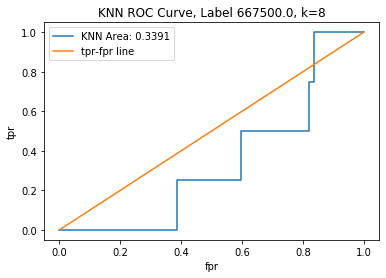

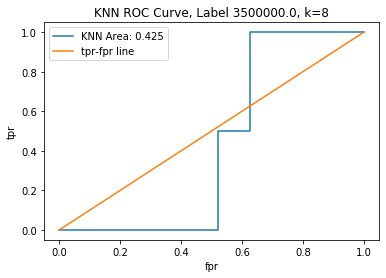

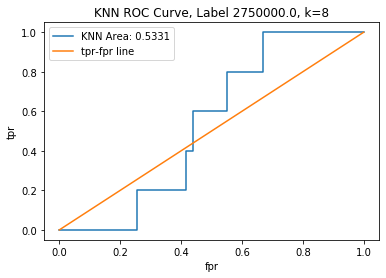

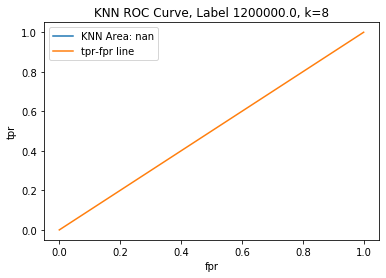

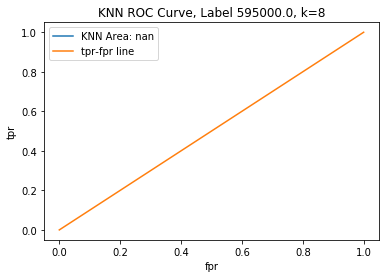

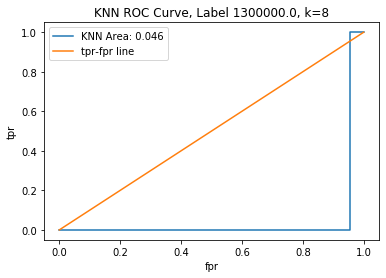

In [70]:
knn_keys6, knn_vals6, knn_labels6 = countUniqueValues(knn_y_pred6)
calcMultiClassROCAUC(X_train6_cmp, y_train6, X_test6_cmp, y_test6, model='KNN', tuner='k',\
 tuner_val=n_neighbors6, labels=knn_labels6, dec=False)

In [71]:
c6 = 10
lr_cma6, lr_cr6, lr_acc6, lr_y_pred6, ky6, val6 = runLogisticRegression(c6, X_train6_cmp, y_train6, X_test6_cmp, y_test6)
print(f'Logistic Regression Highest Accuracy Score, C={ky6}: {val6}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma6[ky6]}\n')

Logistic Regression Highest Accuracy Score, C=3: 0.022900763358778626

Logistic Regression Most Accurate Confusion Matrix

[[3 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



In [72]:
pd.crosstab(y_test6, lr_y_pred6[ky6], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  575000.0  595000.0  615000.0  632500.0  645000.0  670000.0  \
True                                                                    
575000.0          3         0         1         2         0         1   
600000.0          1         0         0         0         0         0   
620000.0          0         0         0         0         0         0   
625000.0          0         0         0         0         0         0   
640000.0          0         0         0         0         0         0   
...             ...       ...       ...       ...       ...       ...   
6500000.0         0         0         0         0         0         0   
7000000.0         0         0         0         1         1         0   
7450000.0         0         0         0         0         0         0   
7500000.0         0         0         0         0         0         0   
All              11         6        18         6         2         4   

Predicted  700000.0  705000.0  717500.0  722500.0  ...  3800000.0  4350000.0  \
True                                               ...                         
575000.0          0         0         0         0  ...          0          0   
600000.0          0         1         0         0  ...          0          1   
620000.0          0         0         0         0  ...          0          0   
625000.0          0         0         0         0  ...          0          0   
640000.0          0         0         0         0  ...          0          0   
...             ...       ...       ...       ...  ...        ...        ...   
6500000.0         0         0         0         0  ...          0          0   
7000000.0         0         0         0         0  ...          0          0   
7450000.0         0         0         0         0  ...          0          0   
7500000.0         0         0         0         0  ...          0          0   
All               2         5         1         1  ...          1          4   

Predicted  5200000.0  5600000.0  5850000.0  6075000.0  7250000.0  9500000.0  \
True                                                                          
575000.0           3          0          2          0          0          2   
600000.0           3          0          2          0          1          1   
620000.0           0          0          0          0          0          0   
625000.0           0          0          0          0          0          0   
640000.0           0          0          0          0          0          0   
...              ...        ...        ...        ...        ...        ...   
6500000.0          0          0          0          0          0          0   
7000000.0          0          0          0          0          0          0   
7450000.0          0          0          0          0          0          0   
7500000.0          0          0          0          0          0          0   
All               17          1         11          1          4         20   

Predicted  11000000.0  All  
True                        
575000.0            0   21  
600000.0            0   19  
620000.0            0    3  
625000.0            0    1  
640000.0            0    1  
...               ...  ...  
6500000.0           0    1  
7000000.0           0    4  
7450000.0           0    1  
7500000.0           0    1  
All                 2  262  

[74 rows x 48 columns]

In [73]:
print(f'\n\t   Logistic Regression Classification Report C={ky6}\n\n{lr_cr6[ky6]}')


	   Logistic Regression Classification Report C=3

              precision    recall  f1-score   support

    575000.0       0.27      0.14      0.19        21
    595000.0       0.00      0.00      0.00         0
    600000.0       0.00      0.00      0.00        19
    615000.0       0.00      0.00      0.00         0
    620000.0       0.00      0.00      0.00         3
    625000.0       0.00      0.00      0.00         1
    632500.0       0.00      0.00      0.00         0
    640000.0       0.00      0.00      0.00         1
    645000.0       0.00      0.00      0.00         1
    650000.0       0.00      0.00      0.00         8
    667500.0       0.00      0.00      0.00         4
    670000.0       0.00      0.00      0.00         3
    675000.0       0.00      0.00      0.00         1
    680000.0       0.00      0.00      0.00         1
    692500.0       0.00      0.00      0.00         1
    700000.0       0.00      0.00      0.00         1
    705000.0       0.00      

In [74]:
lr_keys6, lr_vals6, lr_labels6 = countUniqueValues(lr_y_pred6[ky6])

Keys: dict_keys([3400000.0, 874125.0, 3250000.0, 1200000.0, 724500.0, 595000.0, 1650000.0, 5850000.0, 5200000.0, 575000.0, 705000.0, 11000000.0, 9500000.0, 4350000.0, 5600000.0, 3650000.0, 2825000.0, 722500.0, 2600000.0, 3550000.0, 632500.0, 3275000.0, 615000.0, 850000.0, 925000.0, 670000.0, 1900000.0, 700000.0, 1000000.0, 740000.0, 892500.0, 2000000.0, 767500.0, 1850000.0, 817500.0, 840000.0, 7250000.0, 645000.0, 2300000.0, 867500.0, 3600000.0, 3800000.0, 2725000.0, 735000.0, 6075000.0, 2075000.0, 717500.0])
Values: dict_values([4, 1, 7, 21, 17, 6, 5, 11, 17, 11, 5, 2, 20, 4, 1, 2, 16, 1, 5, 4, 6, 4, 18, 8, 9, 4, 2, 2, 2, 5, 5, 1, 1, 10, 2, 2, 4, 2, 1, 3, 1, 1, 4, 2, 1, 1, 1])
Labels: [3400000.0, 874125.0, 3250000.0, 1200000.0, 724500.0, 595000.0, 1650000.0, 5850000.0, 5200000.0, 575000.0, 705000.0, 11000000.0, 9500000.0, 4350000.0, 5600000.0, 3650000.0, 2825000.0, 722500.0, 2600000.0, 3550000.0, 632500.0, 3275000.0, 615000.0, 850000.0, 925000.0, 670000.0, 1900000.0, 700000.0, 1000000

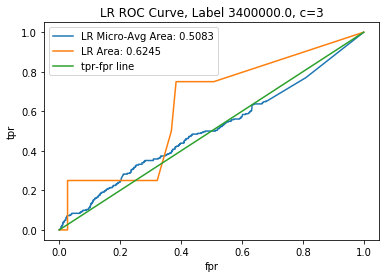

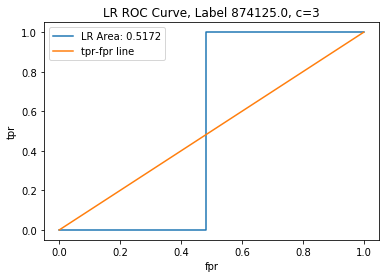

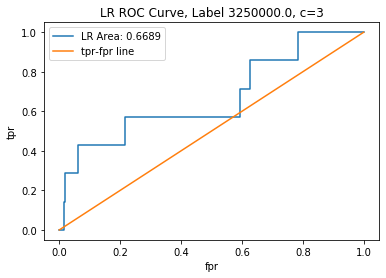

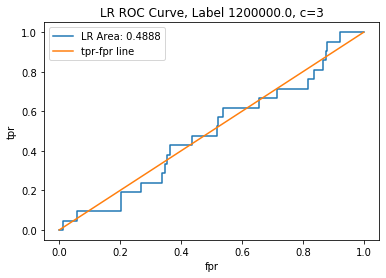

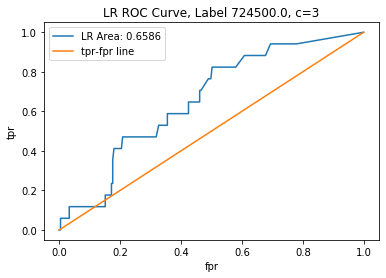

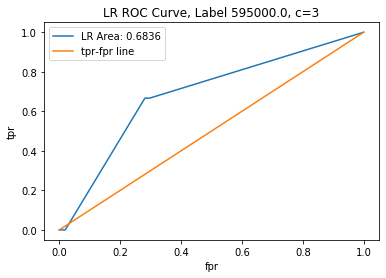

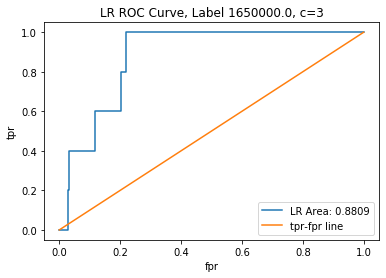

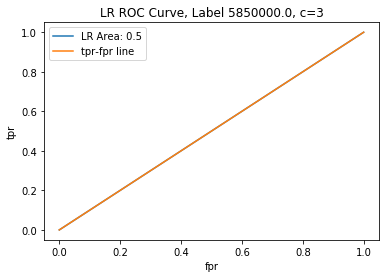

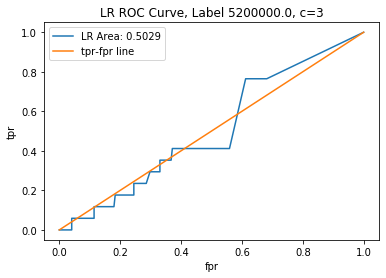

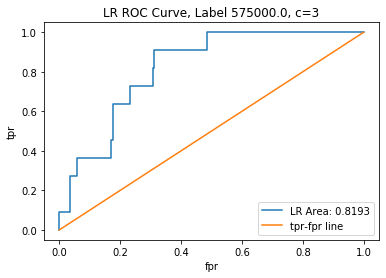

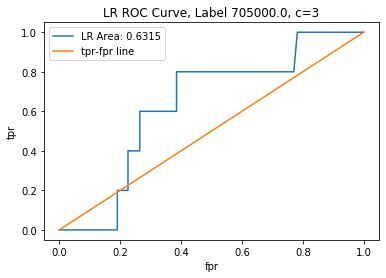

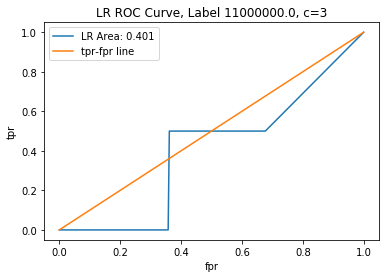

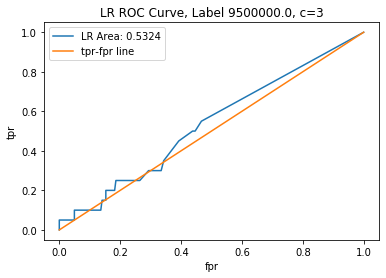

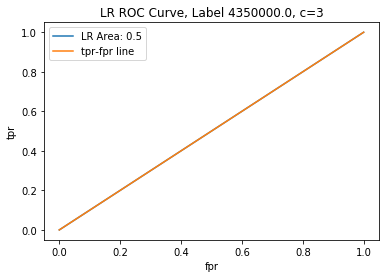

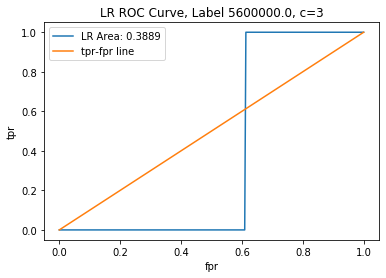

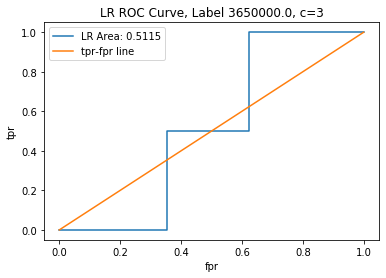

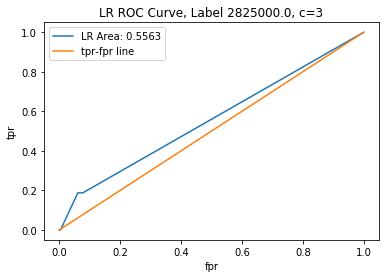

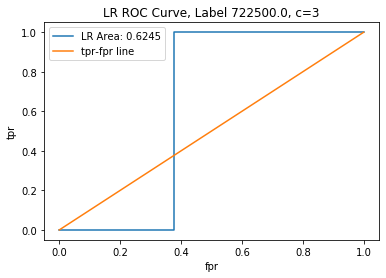

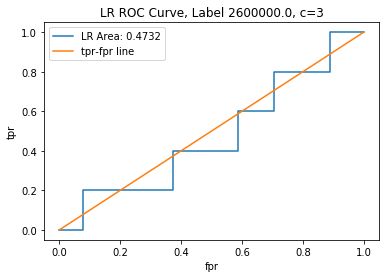

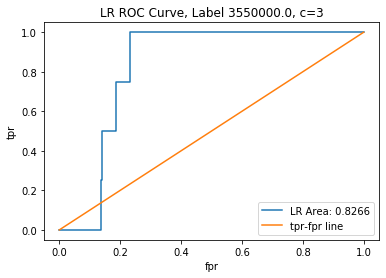

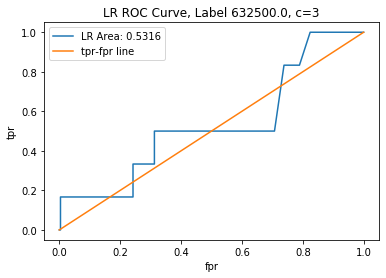

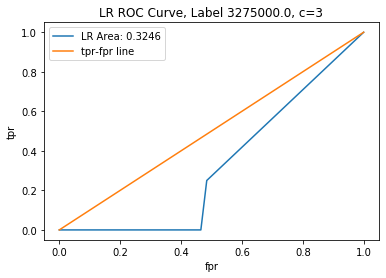

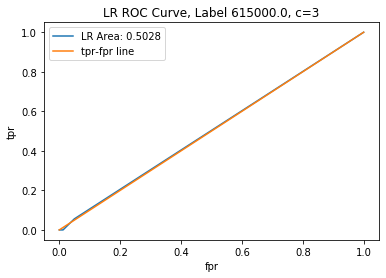

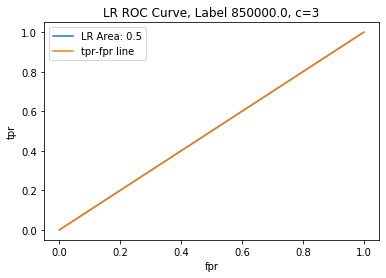

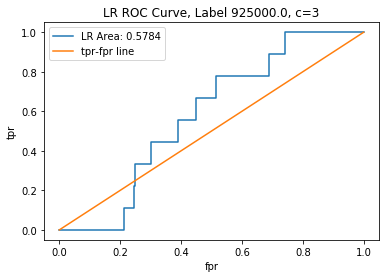

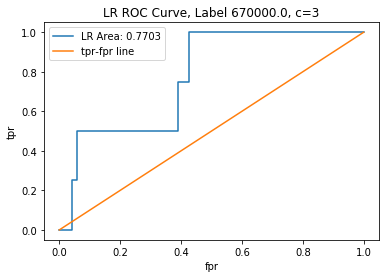

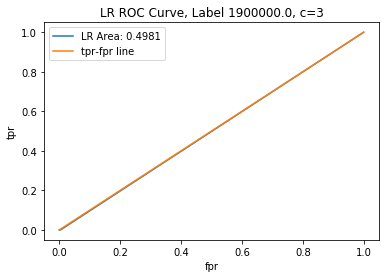

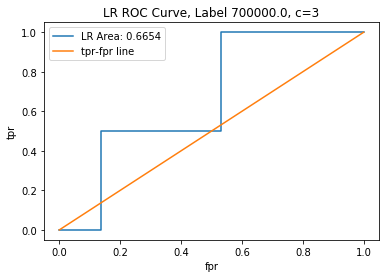

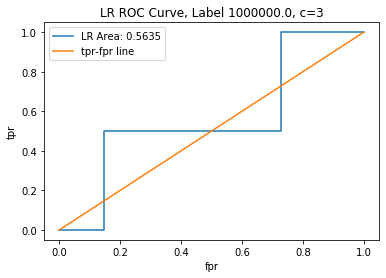

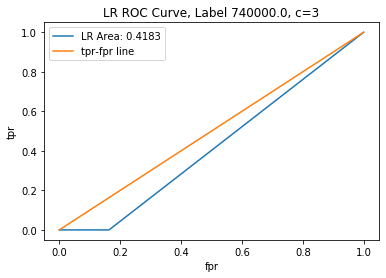

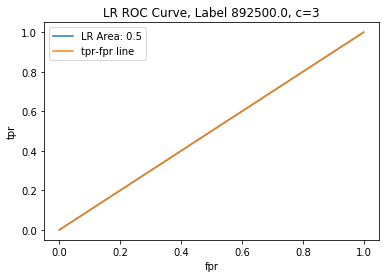

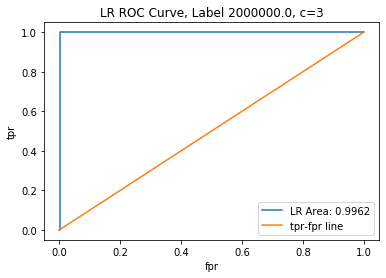

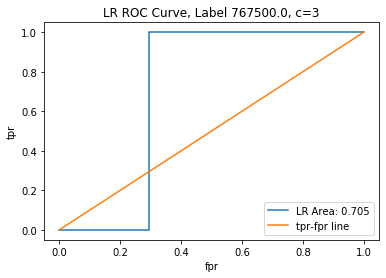

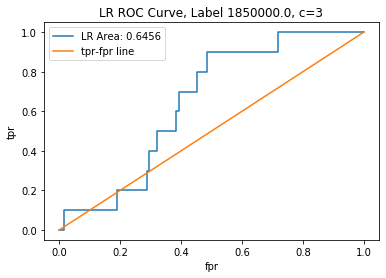

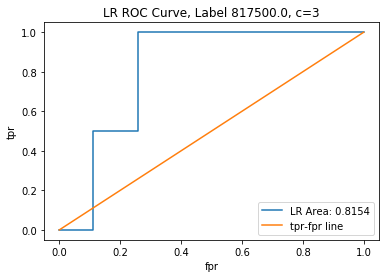

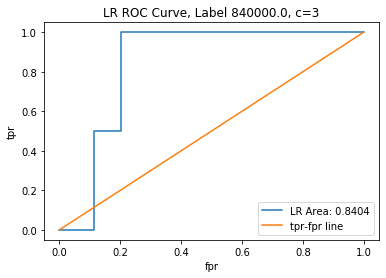

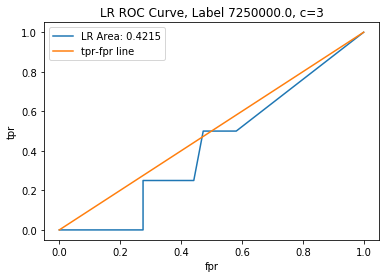

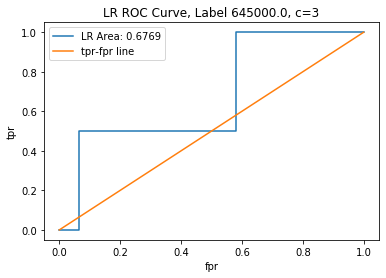

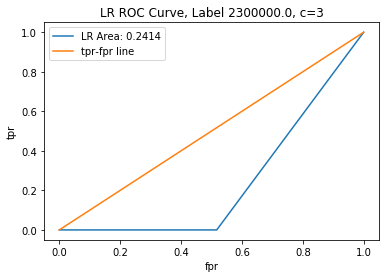

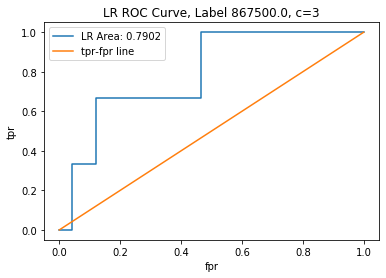

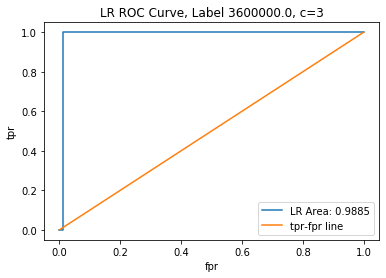

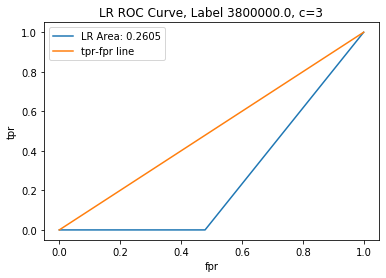

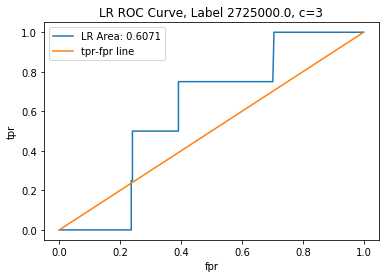

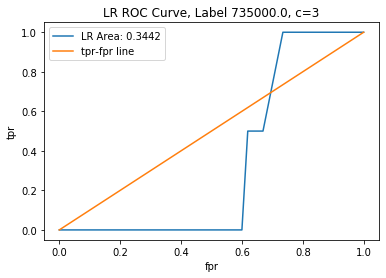

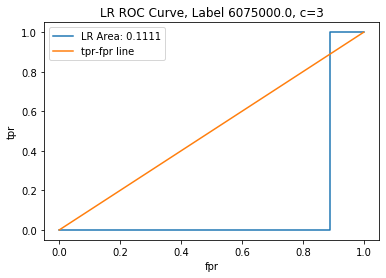

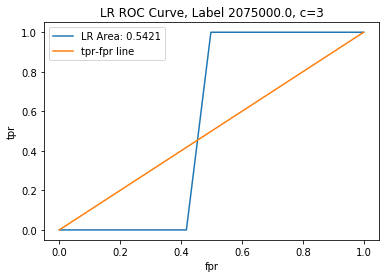

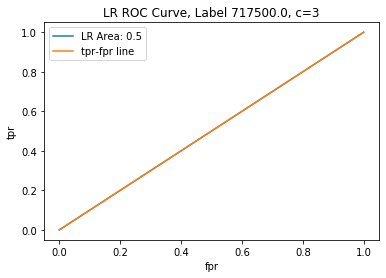

In [75]:
calcMultiClassROCAUC(X_train6_cmp, y_train6, X_test6_cmp, lr_y_pred6[ky6], model='LR', tuner='c',\
                     tuner_val=ky6, labels=lr_labels6, dec=False)

Keys: dict_keys([575000.0, 925000.0, 4000000.0, 625000.0, 700000.0, 800000.0, 600000.0, 3500000.0, 2700000.0, 650000.0, 1200000.0, 667500.0, 1650000.0, 900000.0, 775000.0, 1750000.0, 832500.0, 792500.0, 5500000.0, 675000.0, 615000.0, 725000.0, 4250000.0, 7000000.0, 3750000.0, 3000000.0, 1250000.0, 3250000.0, 5000000.0, 6000000.0, 630000.0, 635000.0, 842500.0, 2000000.0, 1000000.0, 750000.0])
Values: dict_values([43, 84, 12, 4, 11, 6, 31, 2, 1, 22, 1, 4, 1, 4, 1, 1, 3, 3, 1, 3, 1, 2, 2, 1, 1, 1, 2, 1, 2, 4, 1, 2, 1, 1, 1, 1])
Labels: [575000.0, 925000.0, 4000000.0, 625000.0, 700000.0, 800000.0, 600000.0, 3500000.0, 2700000.0, 650000.0, 1200000.0, 667500.0, 1650000.0, 900000.0, 775000.0, 1750000.0, 832500.0, 792500.0, 5500000.0, 675000.0, 615000.0, 725000.0, 4250000.0, 7000000.0, 3750000.0, 3000000.0, 1250000.0, 3250000.0, 5000000.0, 6000000.0, 630000.0, 635000.0, 842500.0, 2000000.0, 1000000.0, 750000.0]

Random Forest Accuracy Score: 0.10305343511450382

Random Forest Confusion Matrix


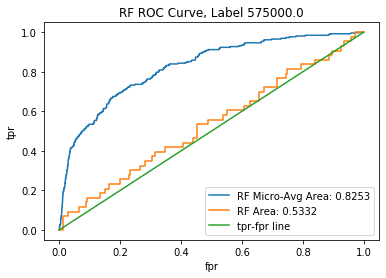

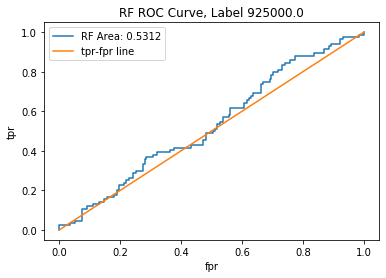

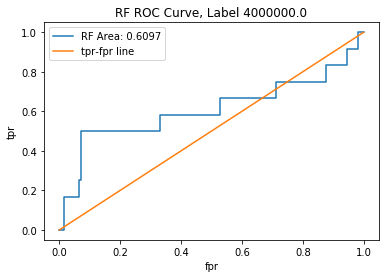

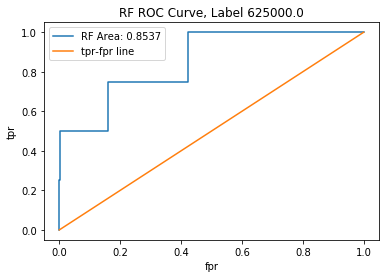

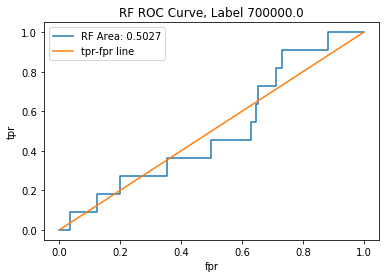

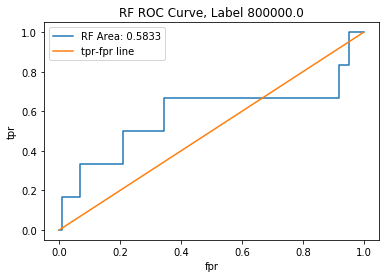

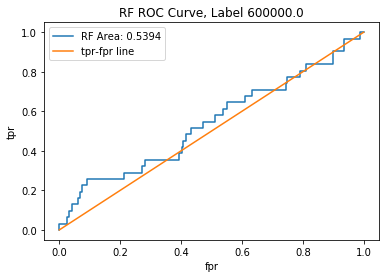

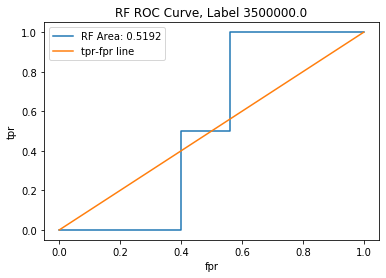

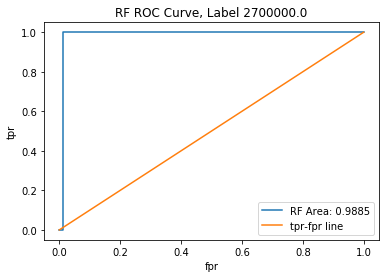

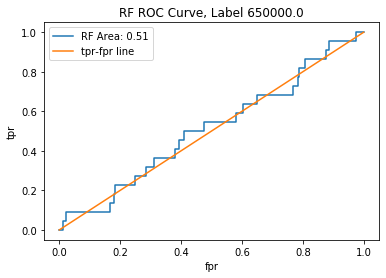

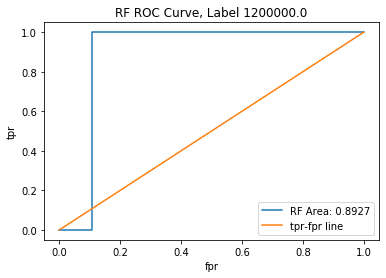

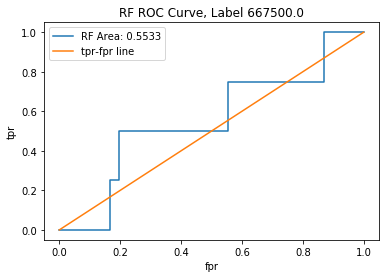

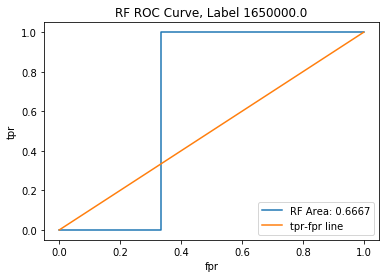

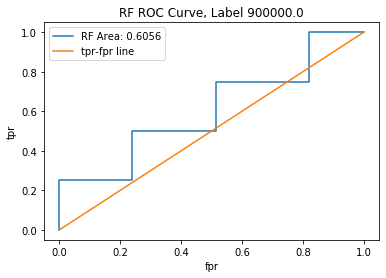

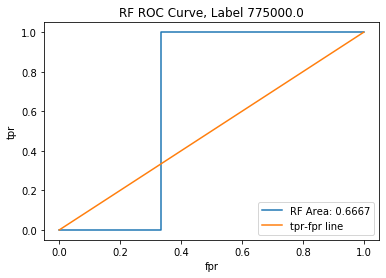

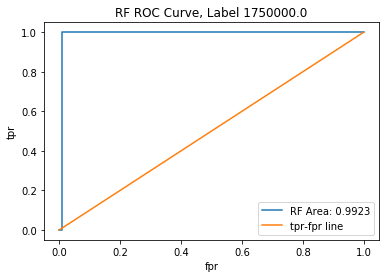

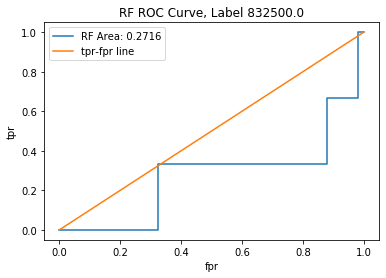

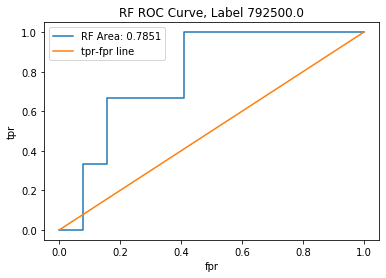

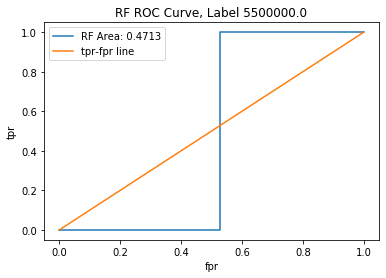

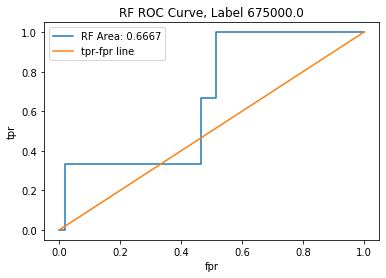

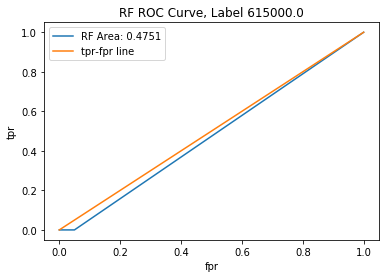

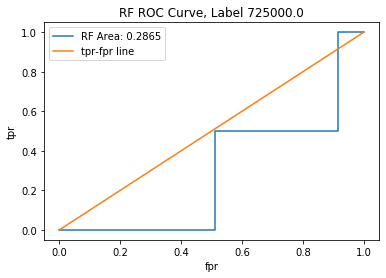

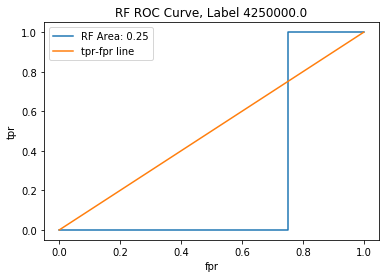

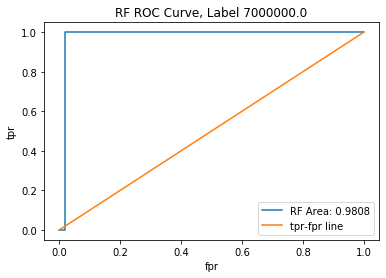

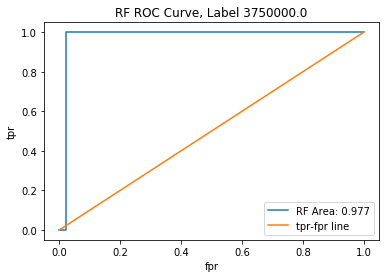

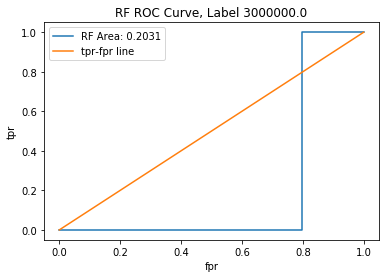

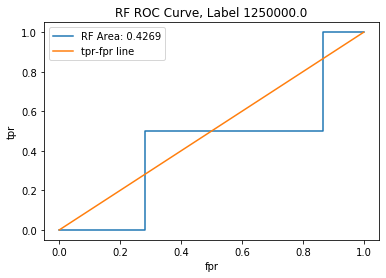

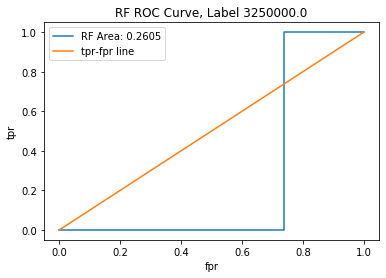

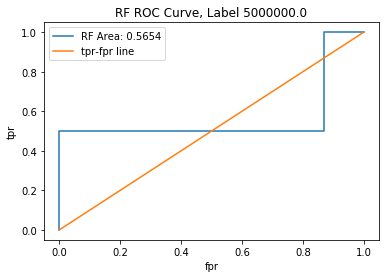

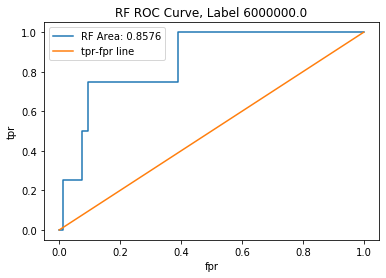

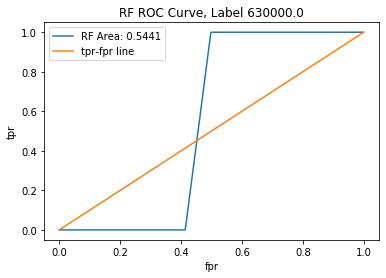

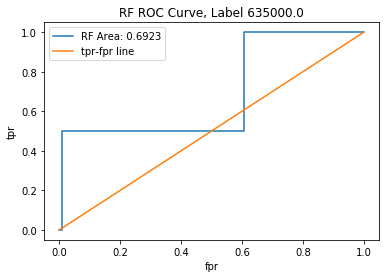

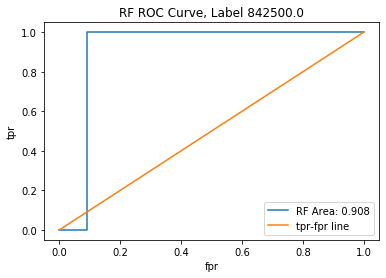

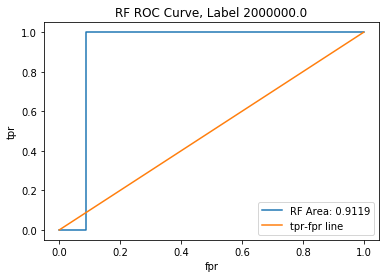

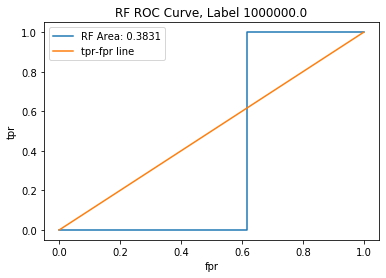

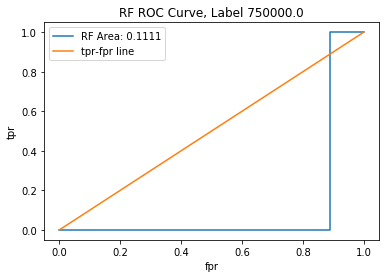

In [76]:
runRandomForest(X_train6_cmp, y_train6, X_test6_cmp, y_test6)

SVM linear Kernel results
_________________________________________
Keys: dict_keys([3700000.0, 800000.0, 2750000.0, 1200000.0, 742500.0, 1650000.0, 600000.0, 5000000.0, 2250000.0, 1250000.0, 3900000.0, 2350000.0, 3750000.0, 5500000.0, 792500.0, 925000.0, 1000000.0, 7000000.0, 5200000.0, 5800000.0, 3500000.0, 4250000.0, 3400000.0, 575000.0, 2400000.0, 717500.0, 3000000.0, 1100000.0, 750000.0, 8000000.0, 700000.0, 4000000.0, 5400000.0, 625000.0, 1500000.0, 6000000.0, 817500.0, 2900000.0, 9000000.0, 2100000.0, 590000.0, 4750000.0, 2500000.0, 5850000.0, 832500.0, 840000.0, 667500.0, 874125.0, 3100000.0, 7500000.0, 640000.0, 2000000.0, 7450000.0, 1850000.0, 900000.0, 5600000.0, 630000.0, 725000.0, 675000.0])
Values: dict_values([2, 5, 1, 1, 1, 1, 20, 6, 4, 8, 2, 2, 4, 2, 15, 40, 5, 9, 2, 3, 6, 4, 2, 14, 7, 1, 8, 4, 1, 2, 9, 12, 4, 11, 4, 4, 3, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1])
Labels: [3700000.0, 800000.0, 2750000.0, 1200000.0, 742500.0, 1650000.0, 600000.0

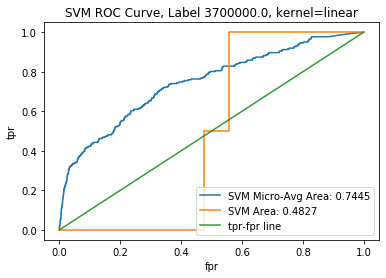

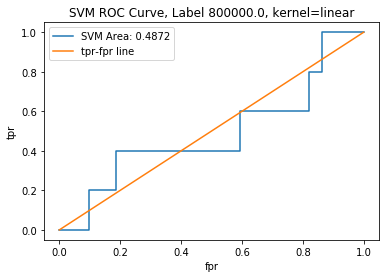

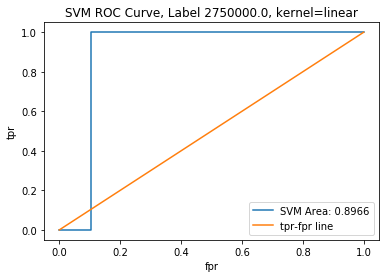

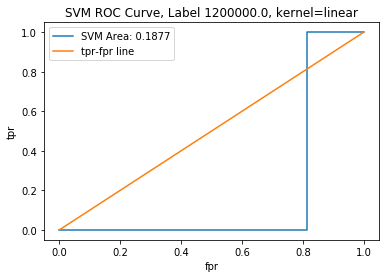

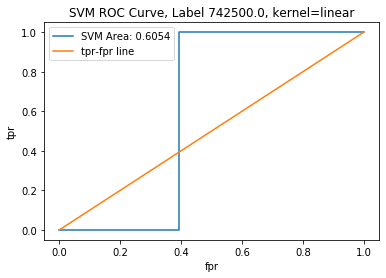

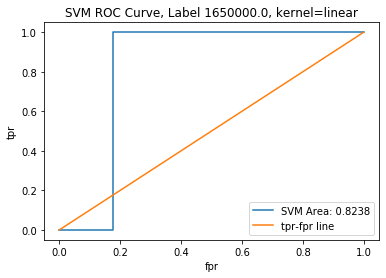

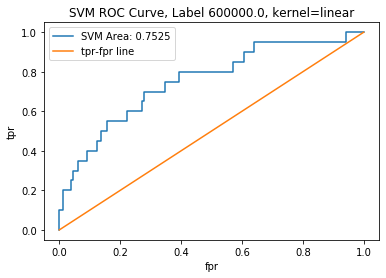

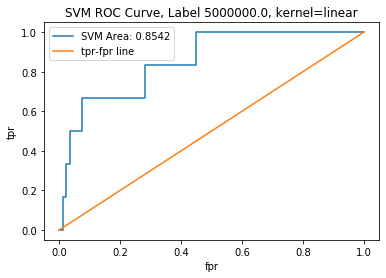

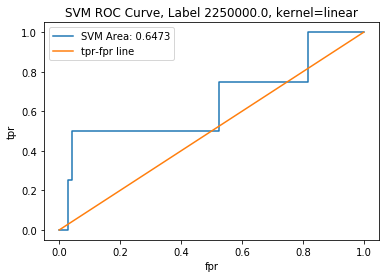

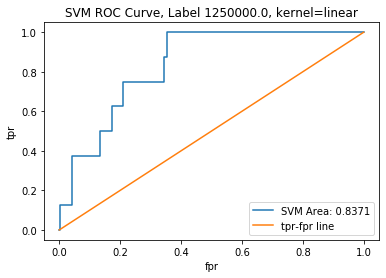

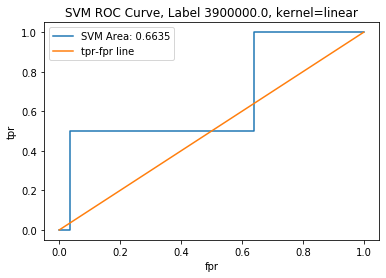

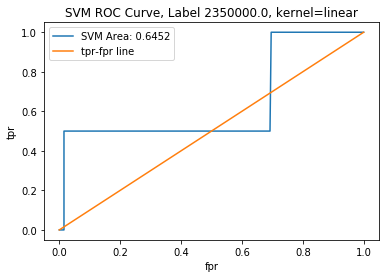

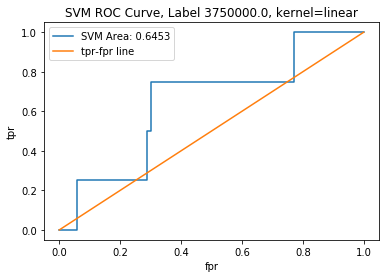

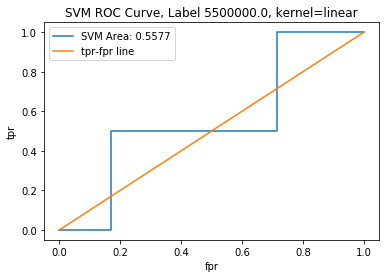

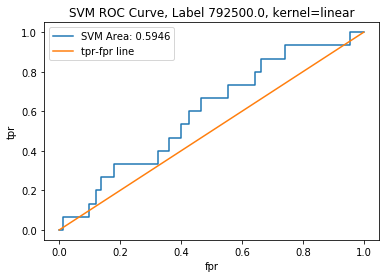

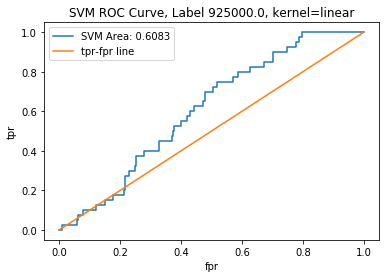

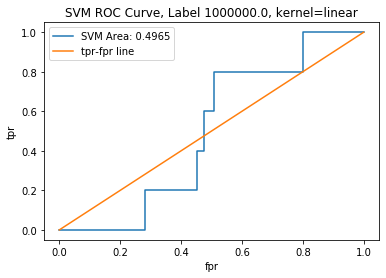

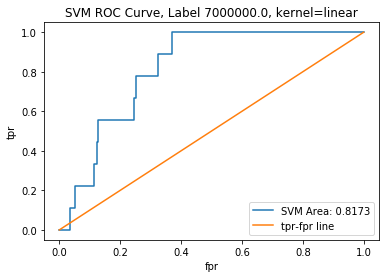

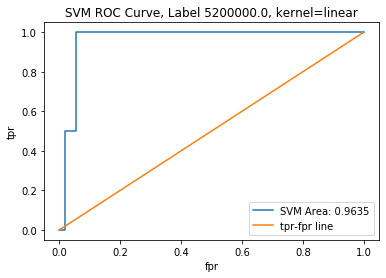

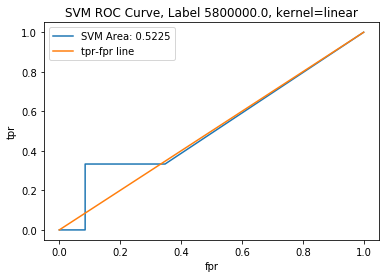

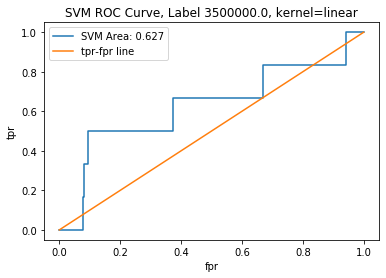

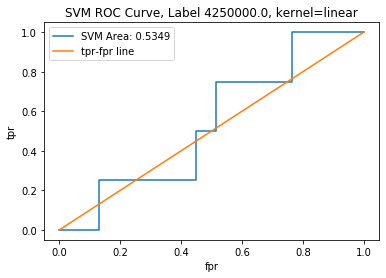

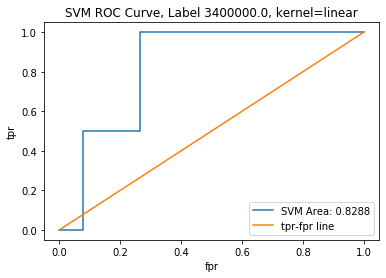

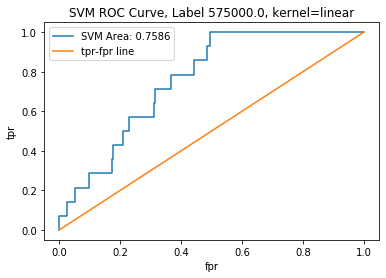

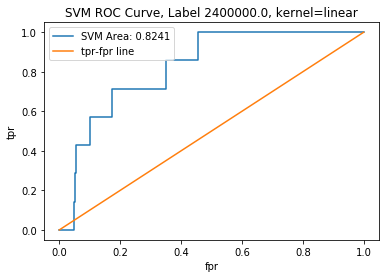

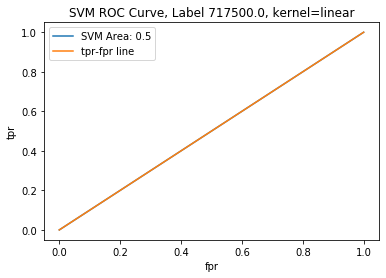

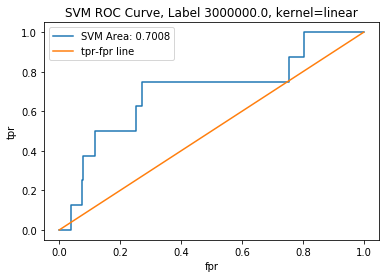

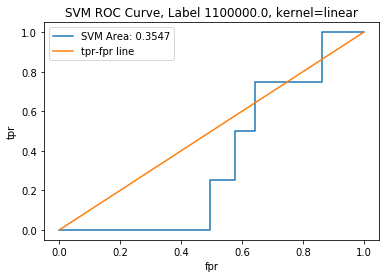

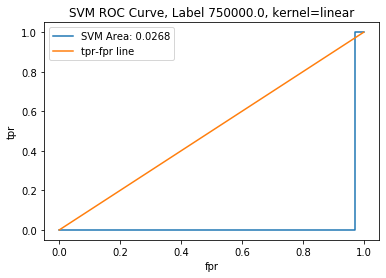

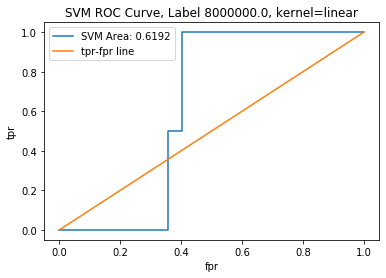

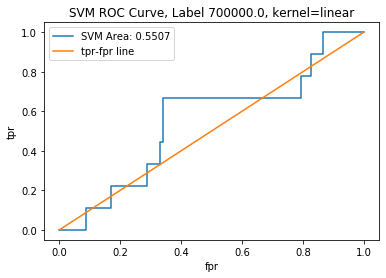

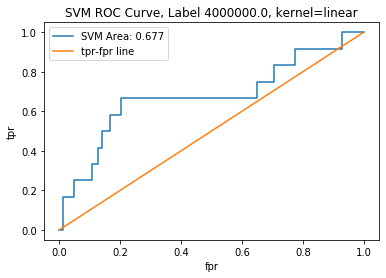

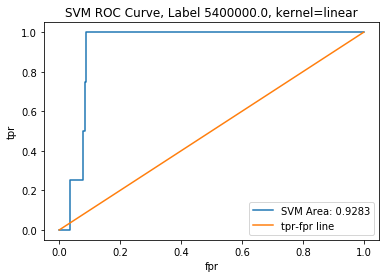

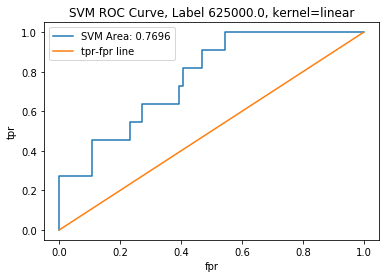

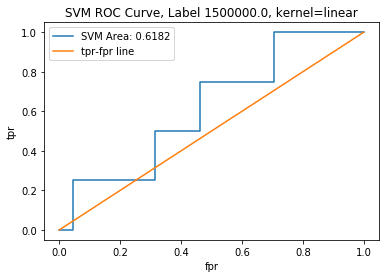

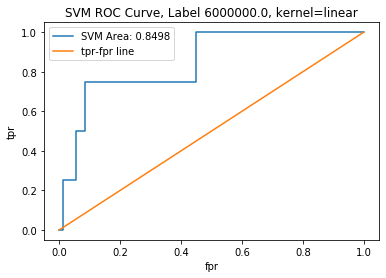

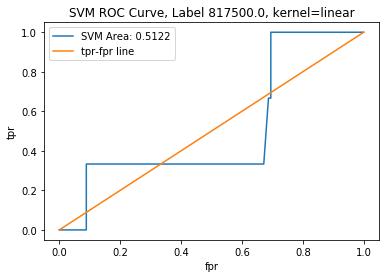

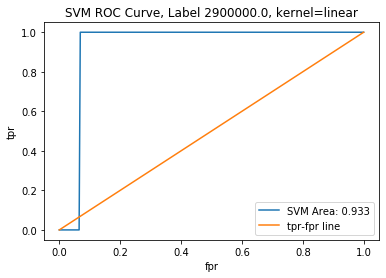

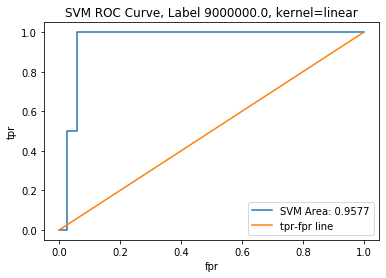

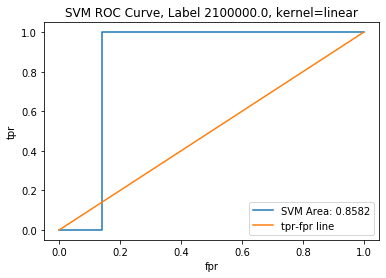

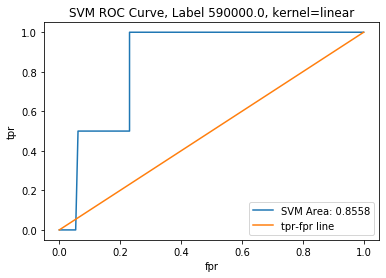

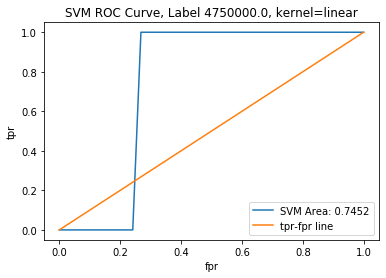

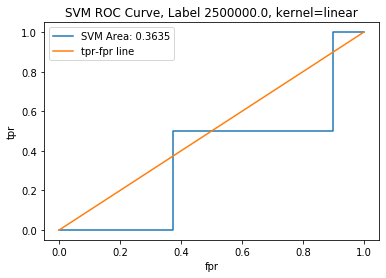

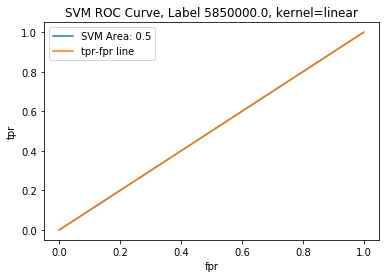

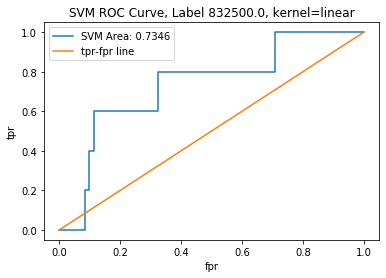

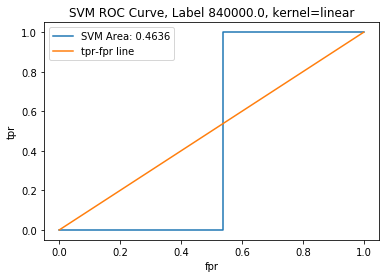

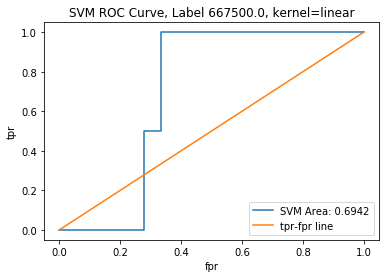

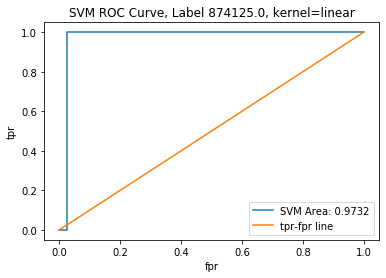

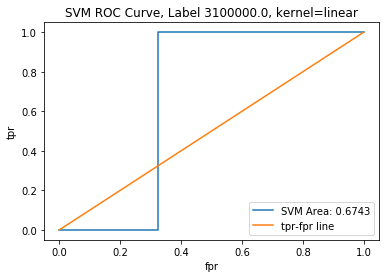

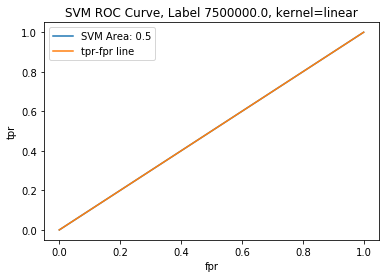

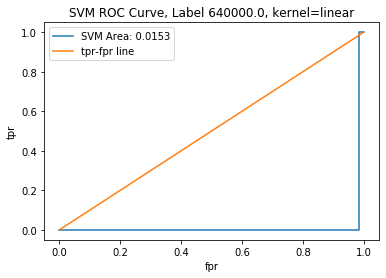

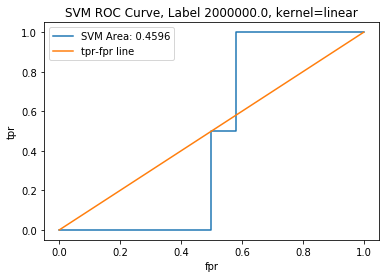

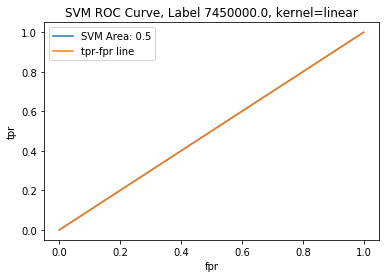

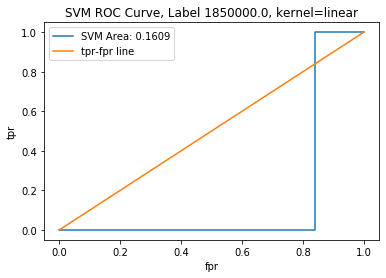

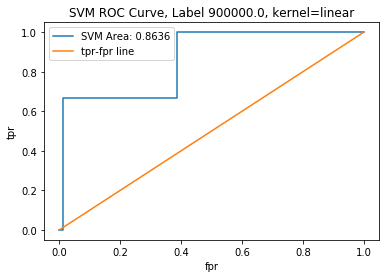

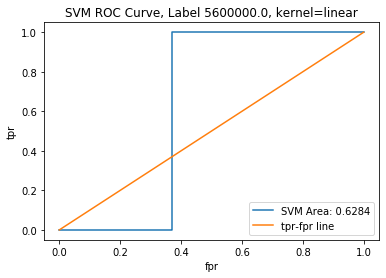

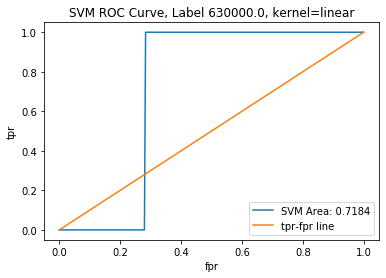

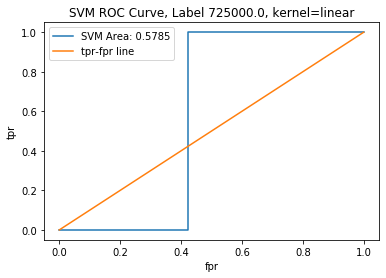

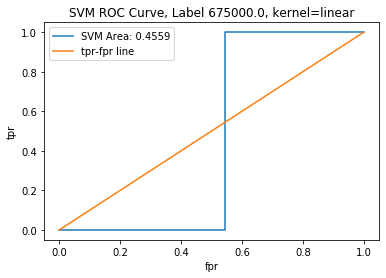

SVM poly Kernel results
_________________________________________


In [ ]:
kernels = ['linear', 'poly', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, X_train6_cmp, y_train6, X_test6_cmp, y_test6)